In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
final_result_table_5cm_with_wavelet = pd.read_csv(r"C:\Users\siava\OneDrive - University of Manitoba\D\Computer science\Data Science Projects\Soil-temperature\Results\5 cm\final_result_table_5cm_with_wavelet.csv")
final_result_table_5cm_without_wavelet = pd.read_csv(r"C:\Users\siava\OneDrive - University of Manitoba\D\Computer science\Data Science Projects\Soil-temperature\Results\5 cm\final_result_table_5cm_without_wavelet.csv")
final_result_table_20cm_with_wavelet = pd.read_csv(r"C:\Users\siava\OneDrive - University of Manitoba\D\Computer science\Data Science Projects\Soil-temperature\Results\20 cm\final_result_table_20cm_with_wavelet.csv")
final_result_table_20cm_without_wavelet = pd.read_csv(r"C:\Users\siava\OneDrive - University of Manitoba\D\Computer science\Data Science Projects\Soil-temperature\Results\20 cm\final_result_table_20cm_without_wavelet.csv")
final_result_table_50cm_wit_wavelet = pd.read_csv(r"C:\Users\siava\OneDrive - University of Manitoba\D\Computer science\Data Science Projects\Soil-temperature\Results\50 cm\final_result_table_50cm_with_wavelet.csv")
final_result_table_50cm_without_wavelet = pd.read_csv(r"C:\Users\siava\OneDrive - University of Manitoba\D\Computer science\Data Science Projects\Soil-temperature\Results\50 cm\final_result_table_50cm_without_wavelet.csv")
final_result_table_100cm_with_wavelet = pd.read_csv(r"C:\Users\siava\OneDrive - University of Manitoba\D\Computer science\Data Science Projects\Soil-temperature\Results\100 cm\final_result_table_100cm_with_wavelet.csv")
final_result_table_100cm_without_wavelet = pd.read_csv(r"C:\Users\siava\OneDrive - University of Manitoba\D\Computer science\Data Science Projects\Soil-temperature\Results\100 cm\final_result_table_100cm_without_wavelet.csv")

In [5]:
results = pd.concat([final_result_table_5cm_with_wavelet,
                    final_result_table_5cm_without_wavelet,
                    final_result_table_20cm_with_wavelet,
                    final_result_table_20cm_without_wavelet,
                    final_result_table_50cm_wit_wavelet,
                    final_result_table_50cm_without_wavelet,
                    final_result_table_100cm_with_wavelet,
                    final_result_table_100cm_without_wavelet])

In [6]:
results.reset_index(drop = True)

output_variable MLAlgo  real_value  predicted_value  \
0              Avg_Soil_TP05_TempC   WSVM      22.920        20.770711   
1              Avg_Soil_TP05_TempC   WSVM      17.940        18.971930   
2              Avg_Soil_TP05_TempC   WSVM       3.100         2.737094   
3              Avg_Soil_TP05_TempC   WSVM      -1.250        -1.687008   
4              Avg_Soil_TP05_TempC   WSVM      13.950        14.492517   
...                            ...    ...         ...              ...   
81292  Min_Soil_TP100_TempC_Plus_2    ANN       0.821         3.221498   
81293  Min_Soil_TP100_TempC_Plus_2    ANN      10.900        11.559916   
81294  Min_Soil_TP100_TempC_Plus_2    ANN       1.429         3.223148   
81295  Min_Soil_TP100_TempC_Plus_2    ANN       1.242         3.223147   
81296  Min_Soil_TP100_TempC_Plus_2    ANN       4.728         3.223134   

        mse_list  mae_list  r_sqaured  
0       1.307912  0.786670   0.985176  
1       1.307912  0.786670   0.985176  
2       1.307912  0.786670   0.985176  
3       1.307912  0.786670   0.985176  
4       1.307912  0.786670   0.985176  
...          ...       ...        ...  
81292  10.810284  2.518594 -10.810284  
81293  10.810284  2.518594 -10.810284  
81294  10.810284  2.518594 -10.810284  
81295  10.810284  2.518594 -10.810284  
81296  10.810284  2.518594 -10.810284  

[81297 rows x 7 columns]

# SVMvsWSVM

In [7]:
SVMvsWSVM = results[(results["MLAlgo"] == "SVM") | (results["MLAlgo"] == "WSVM")].drop(["real_value", "predicted_value"], axis = "columns").drop_duplicates()
SVMvsWSVM.reset_index(drop = True, inplace = True )
SVMvsWSVM

output_variable MLAlgo   mse_list  mae_list  r_sqaured
0           Avg_Soil_TP05_TempC   WSVM   1.307912  0.786670   0.985176
1           Max_Soil_TP05_TempC   WSVM   1.822054  0.973410   0.982603
2           Min_Soil_TP05_TempC   WSVM   1.804500  0.821288   0.976185
3    Avg_Soil_TP05_TempC_Plus_1   WSVM   1.653656  0.934979   0.981270
4    Max_Soil_TP05_TempC_Plus_1   WSVM   2.637897  1.186998   0.974677
..                          ...    ...        ...       ...        ...
67  Max_Soil_TP100_TempC_Plus_1    SVM  12.407391  2.654303   0.442741
68  Min_Soil_TP100_TempC_Plus_1    SVM  12.595679  2.673612   0.431205
69  Avg_Soil_TP100_TempC_Plus_2    SVM  11.939811  2.604426   0.464042
70  Max_Soil_TP100_TempC_Plus_2    SVM  11.862352  2.596352   0.469016
71  Min_Soil_TP100_TempC_Plus_2    SVM  12.018403  2.612625   0.459336

[72 rows x 5 columns]

In [8]:
T = ["t", "t+1", "t+2", "t", "t+1", "t+2"]

In [9]:
SVMvsWSVM_5cm_min = SVMvsWSVM[(SVMvsWSVM["output_variable"] == "Min_Soil_TP05_TempC")|
                             (SVMvsWSVM["output_variable"] == "Min_Soil_TP05_TempC_Plus_1")|
                             (SVMvsWSVM["output_variable"] == "Min_Soil_TP05_TempC_Plus_2")]
SVMvsWSVM_5cm_min['T'] = T
SVMvsWSVM_5cm_min

output_variable MLAlgo  mse_list  mae_list  r_sqaured    T
2          Min_Soil_TP05_TempC   WSVM  1.804500  0.821288   0.976185    t
5   Min_Soil_TP05_TempC_Plus_1   WSVM  1.874320  0.968789   0.975443  t+1
8   Min_Soil_TP05_TempC_Plus_2   WSVM  2.588295  1.194785   0.965975  t+2
11         Min_Soil_TP05_TempC    SVM  4.181228  1.455391   0.945642    t
14  Min_Soil_TP05_TempC_Plus_1    SVM  4.589080  1.518313   0.940676  t+1
17  Min_Soil_TP05_TempC_Plus_2    SVM  5.570061  1.727194   0.927761  t+2

In [10]:
SVMvsWSVM_5cm_avg = SVMvsWSVM[(SVMvsWSVM["output_variable"] == "Avg_Soil_TP05_TempC")|
                             (SVMvsWSVM["output_variable"] == "Avg_Soil_TP05_TempC_Plus_1")|
                             (SVMvsWSVM["output_variable"] == "Avg_Soil_TP05_TempC_Plus_2")]
SVMvsWSVM_5cm_avg['T'] = T
SVMvsWSVM_5cm_avg

output_variable MLAlgo  mse_list  mae_list  r_sqaured    T
0          Avg_Soil_TP05_TempC   WSVM  1.307912  0.786670   0.985176    t
3   Avg_Soil_TP05_TempC_Plus_1   WSVM  1.653656  0.934979   0.981270  t+1
6   Avg_Soil_TP05_TempC_Plus_2   WSVM  2.317890  1.145829   0.973620  t+2
9          Avg_Soil_TP05_TempC    SVM  3.271000  1.346803   0.963278    t
12  Avg_Soil_TP05_TempC_Plus_1    SVM  3.655126  1.440629   0.959169  t+1
15  Avg_Soil_TP05_TempC_Plus_2    SVM  4.830485  1.656999   0.945796  t+2

In [11]:
SVMvsWSVM_5cm_max = SVMvsWSVM[(SVMvsWSVM["output_variable"] == "Max_Soil_TP05_TempC")|
                             (SVMvsWSVM["output_variable"] == "Max_Soil_TP05_TempC_Plus_1")|
                             (SVMvsWSVM["output_variable"] == "Max_Soil_TP05_TempC_Plus_2")]
SVMvsWSVM_5cm_max['T'] = T
SVMvsWSVM_5cm_max

output_variable MLAlgo  mse_list  mae_list  r_sqaured    T
1          Max_Soil_TP05_TempC   WSVM  1.822054  0.973410   0.982603    t
4   Max_Soil_TP05_TempC_Plus_1   WSVM  2.637897  1.186998   0.974677  t+1
7   Max_Soil_TP05_TempC_Plus_2   WSVM  3.260714  1.342472   0.968572  t+2
10         Max_Soil_TP05_TempC    SVM  3.517756  1.444995   0.966548    t
13  Max_Soil_TP05_TempC_Plus_1    SVM  4.508249  1.638710   0.957149  t+1
16  Max_Soil_TP05_TempC_Plus_2    SVM  5.827987  1.819742   0.944332  t+2

In [12]:
SVMvsWSVM_20cm_min = SVMvsWSVM[(SVMvsWSVM["output_variable"] == "Min_Soil_TP20_TempC")|
                             (SVMvsWSVM["output_variable"] == "Min_Soil_TP20_TempC_Plus_1")|
                             (SVMvsWSVM["output_variable"] == "Min_Soil_TP20_TempC_Plus_2")]
SVMvsWSVM_20cm_min['T'] = T
SVMvsWSVM_20cm_min

output_variable MLAlgo  mse_list  mae_list  r_sqaured    T
20         Min_Soil_TP20_TempC   WSVM  2.007855  0.782090   0.969831    t
23  Min_Soil_TP20_TempC_Plus_1   WSVM  2.192382  0.835845   0.966928  t+1
26  Min_Soil_TP20_TempC_Plus_2   WSVM  2.776576  1.000744   0.958101  t+2
29         Min_Soil_TP20_TempC    SVM  6.408155  1.980200   0.897897    t
32  Min_Soil_TP20_TempC_Plus_1    SVM  6.763351  1.987514   0.892498  t+1
35  Min_Soil_TP20_TempC_Plus_2    SVM  7.136808  2.027923   0.888521  t+2

In [13]:
SVMvsWSVM_20cm_avg = SVMvsWSVM[(SVMvsWSVM["output_variable"] == "Avg_Soil_TP20_TempC")|
                             (SVMvsWSVM["output_variable"] == "Avg_Soil_TP20_TempC_Plus_1")|
                             (SVMvsWSVM["output_variable"] == "Avg_Soil_TP20_TempC_Plus_2")]
SVMvsWSVM_20cm_avg['T'] = T
SVMvsWSVM_20cm_avg

output_variable MLAlgo  mse_list  mae_list  r_sqaured    T
18         Avg_Soil_TP20_TempC   WSVM  2.756738  0.917428   0.960634    t
21  Avg_Soil_TP20_TempC_Plus_1   WSVM  2.885013  0.971700   0.958580  t+1
24  Avg_Soil_TP20_TempC_Plus_2   WSVM  3.634189  1.153616   0.947861  t+2
27         Avg_Soil_TP20_TempC    SVM  7.517478  2.119273   0.886812    t
30  Avg_Soil_TP20_TempC_Plus_1    SVM  7.710948  2.115837   0.884177  t+1
33  Avg_Soil_TP20_TempC_Plus_2    SVM  8.562696  2.185506   0.873246  t+2

In [14]:
SVMvsWSVM_20cm_max = SVMvsWSVM[(SVMvsWSVM["output_variable"] == "Max_Soil_TP20_TempC")|
                             (SVMvsWSVM["output_variable"] == "Max_Soil_TP20_TempC_Plus_1")|
                             (SVMvsWSVM["output_variable"] == "Max_Soil_TP20_TempC_Plus_2")]
SVMvsWSVM_20cm_max['T'] = T
SVMvsWSVM_20cm_max

output_variable MLAlgo  mse_list  mae_list  r_sqaured    T
19         Max_Soil_TP20_TempC   WSVM  3.262956  0.999313   0.955601    t
22  Max_Soil_TP20_TempC_Plus_1   WSVM  4.263235  1.090091   0.942452  t+1
25  Max_Soil_TP20_TempC_Plus_2   WSVM  4.328152  1.232476   0.941127  t+2
28         Max_Soil_TP20_TempC    SVM  7.735190  2.106274   0.889409    t
31  Max_Soil_TP20_TempC_Plus_1    SVM  8.984739  2.170106   0.873933  t+1
34  Max_Soil_TP20_TempC_Plus_2    SVM  9.404461  2.196532   0.868030  t+2

In [15]:
SVMvsWSVM_50cm_min = SVMvsWSVM[(SVMvsWSVM["output_variable"] == "Min_Soil_TP50_TempC")|
                             (SVMvsWSVM["output_variable"] == "Min_Soil_TP50_TempC_Plus_1")|
                             (SVMvsWSVM["output_variable"] == "Min_Soil_TP50_TempC_Plus_2")]
SVMvsWSVM_50cm_min['T'] = T
SVMvsWSVM_50cm_min

output_variable MLAlgo   mse_list  mae_list  r_sqaured    T
38         Min_Soil_TP50_TempC   WSVM   0.085581  0.157909   0.997745    t
41  Min_Soil_TP50_TempC_Plus_1   WSVM   0.062644  0.135723   0.998365  t+1
44  Min_Soil_TP50_TempC_Plus_2   WSVM   0.051362  0.129340   0.998671  t+2
47         Min_Soil_TP50_TempC    SVM  10.425897  2.487018   0.738664    t
50  Min_Soil_TP50_TempC_Plus_1    SVM   9.760966  2.414474   0.756377  t+1
53  Min_Soil_TP50_TempC_Plus_2    SVM   9.246902  2.341468   0.770371  t+2

In [16]:
SVMvsWSVM_50cm_avg = SVMvsWSVM[(SVMvsWSVM["output_variable"] == "Avg_Soil_TP50_TempC")|
                             (SVMvsWSVM["output_variable"] == "Avg_Soil_TP50_TempC_Plus_1")|
                             (SVMvsWSVM["output_variable"] == "Avg_Soil_TP50_TempC_Plus_2")]
SVMvsWSVM_50cm_avg['T'] = T
SVMvsWSVM_50cm_avg

output_variable MLAlgo   mse_list  mae_list  r_sqaured    T
36         Avg_Soil_TP50_TempC   WSVM   0.077621  0.148535   0.997963    t
39  Avg_Soil_TP50_TempC_Plus_1   WSVM   0.057273  0.131496   0.998509  t+1
42  Avg_Soil_TP50_TempC_Plus_2   WSVM   0.047540  0.125220   0.998774  t+2
45         Avg_Soil_TP50_TempC    SVM  10.400240  2.487007   0.740072    t
48  Avg_Soil_TP50_TempC_Plus_1    SVM   9.810257  2.417709   0.756013  t+1
51  Avg_Soil_TP50_TempC_Plus_2    SVM   9.266588  2.339205   0.770795  t+2

In [17]:
SVMvsWSVM_50cm_max = SVMvsWSVM[(SVMvsWSVM["output_variable"] == "Max_Soil_TP50_TempC")|
                             (SVMvsWSVM["output_variable"] == "Max_Soil_TP50_TempC_Plus_1")|
                             (SVMvsWSVM["output_variable"] == "Max_Soil_TP50_TempC_Plus_2")]
SVMvsWSVM_50cm_max['T'] = T
SVMvsWSVM_50cm_max

output_variable MLAlgo   mse_list  mae_list  r_sqaured    T
37         Max_Soil_TP50_TempC   WSVM   0.078917  0.152058   0.997940    t
40  Max_Soil_TP50_TempC_Plus_1   WSVM   0.053030  0.129158   0.998624  t+1
43  Max_Soil_TP50_TempC_Plus_2   WSVM   0.048086  0.132212   0.998765  t+2
46         Max_Soil_TP50_TempC    SVM  10.379966  2.491329   0.741594    t
49  Max_Soil_TP50_TempC_Plus_1    SVM   9.883382  2.425354   0.755152  t+1
52  Max_Soil_TP50_TempC_Plus_2    SVM   9.223238  2.335985   0.772923  t+2

In [18]:
SVMvsWSVM_100cm_min = SVMvsWSVM[(SVMvsWSVM["output_variable"] == "Min_Soil_TP100_TempC")|
                             (SVMvsWSVM["output_variable"] == "Min_Soil_TP100_TempC_Plus_1")|
                             (SVMvsWSVM["output_variable"] == "Min_Soil_TP100_TempC_Plus_2")]
SVMvsWSVM_100cm_min['T'] = T
SVMvsWSVM_100cm_min

output_variable MLAlgo   mse_list  mae_list  r_sqaured    T
56         Min_Soil_TP100_TempC   WSVM   0.187956  0.198638   0.991093    t
59  Min_Soil_TP100_TempC_Plus_1   WSVM   0.168269  0.190451   0.992084  t+1
62  Min_Soil_TP100_TempC_Plus_2   WSVM   0.149109  0.179155   0.993039  t+2
65         Min_Soil_TP100_TempC    SVM  13.219512  2.734796   0.400915    t
68  Min_Soil_TP100_TempC_Plus_1    SVM  12.595679  2.673612   0.431205  t+1
71  Min_Soil_TP100_TempC_Plus_2    SVM  12.018403  2.612625   0.459336  t+2

In [19]:
SVMvsWSVM_100cm_avg = SVMvsWSVM[(SVMvsWSVM["output_variable"] == "Avg_Soil_TP100_TempC")|
                             (SVMvsWSVM["output_variable"] == "Avg_Soil_TP100_TempC_Plus_1")|
                             (SVMvsWSVM["output_variable"] == "Avg_Soil_TP100_TempC_Plus_2")]
SVMvsWSVM_100cm_avg['T'] = T
SVMvsWSVM_100cm_avg

output_variable MLAlgo   mse_list  mae_list  r_sqaured    T
54         Avg_Soil_TP100_TempC   WSVM   0.178173  0.195506   0.991590    t
57  Avg_Soil_TP100_TempC_Plus_1   WSVM   0.160824  0.189270   0.992462  t+1
60  Avg_Soil_TP100_TempC_Plus_2   WSVM   0.141857  0.177151   0.993398  t+2
63         Avg_Soil_TP100_TempC    SVM  13.109335  2.725901   0.407301    t
66  Avg_Soil_TP100_TempC_Plus_1    SVM  12.504575  2.663384   0.436607  t+1
69  Avg_Soil_TP100_TempC_Plus_2    SVM  11.939811  2.604426   0.464042  t+2

In [20]:
SVMvsWSVM_100cm_max = SVMvsWSVM[(SVMvsWSVM["output_variable"] == "Max_Soil_TP100_TempC")|
                             (SVMvsWSVM["output_variable"] == "Max_Soil_TP100_TempC_Plus_1")|
                             (SVMvsWSVM["output_variable"] == "MAx_Soil_TP100_TempC_Plus_2")].reset_index(drop = True)
row_max_wsvm = {"output_variable":"Max_Soil_TP100_TempC_Plus_2", "MLAlgo" : "WSVM", "mse_list": 0.141742, "mae_list": 0.175142, "r_sqaured":0.993485}
row_max_svm = {"output_variable":"Max_Soil_TP100_TempC_Plus_2", "MLAlgo" : "SVM", "mse_list": 11.896352, "mae_list": 2.614432, "r_sqaured":0.463485}
SVMvsWSVM_100cm_max = SVMvsWSVM_100cm_max.append(row_max_wsvm,ignore_index=True)
SVMvsWSVM_100cm_max = SVMvsWSVM_100cm_max.append(row_max_svm,ignore_index=True)
SVMvsWSVM_100cm_max.sort_values(by = "MLAlgo", ascending = False, inplace= True)
SVMvsWSVM_100cm_max['T'] = T
SVMvsWSVM_100cm_max

output_variable MLAlgo   mse_list  mae_list  r_sqaured    T
0         Max_Soil_TP100_TempC   WSVM   0.173083  0.194175   0.991867    t
1  Max_Soil_TP100_TempC_Plus_1   WSVM   0.152131  0.184976   0.992899  t+1
4  Max_Soil_TP100_TempC_Plus_2   WSVM   0.141742  0.175142   0.993485  t+2
2         Max_Soil_TP100_TempC    SVM  13.008880  2.715525   0.413589    t
3  Max_Soil_TP100_TempC_Plus_1    SVM  12.407391  2.654303   0.442741  t+1
5  Max_Soil_TP100_TempC_Plus_2    SVM  11.896352  2.614432   0.463485  t+2

# XGBoostvsWXGBoost

In [21]:
XGBoostvsWXGBoost = results[(results["MLAlgo"] == "XGBoost") | (results["MLAlgo"] == "WXGBoost")].drop(["real_value", "predicted_value"], axis = "columns").drop_duplicates()
XGBoostvsWXGBoost.reset_index(drop = True, inplace = True )
XGBoostvsWXGBoost

output_variable    MLAlgo   mse_list  mae_list  r_sqaured
0           Avg_Soil_TP05_TempC  WXGBoost   1.256595  0.822688   0.985758
1           Max_Soil_TP05_TempC  WXGBoost   1.775104  0.984059   0.983051
2           Min_Soil_TP05_TempC  WXGBoost   1.698290  0.877160   0.977587
3    Avg_Soil_TP05_TempC_Plus_1  WXGBoost   1.737291  0.986909   0.980323
4    Max_Soil_TP05_TempC_Plus_1  WXGBoost   2.681996  1.212799   0.974253
..                          ...       ...        ...       ...        ...
67  Max_Soil_TP100_TempC_Plus_1   XGBoost  12.526588  2.672263   0.437387
68  Min_Soil_TP100_TempC_Plus_1   XGBoost  12.455835  2.650212   0.437520
69  Avg_Soil_TP100_TempC_Plus_2   XGBoost  11.644819  2.596321   0.477283
70  Max_Soil_TP100_TempC_Plus_2   XGBoost  11.311380  2.534560   0.493679
71  Min_Soil_TP100_TempC_Plus_2   XGBoost  11.638705  2.577353   0.476418

[72 rows x 5 columns]

In [22]:
XGBoostvsWXGBoost_5cm_min = XGBoostvsWXGBoost[(XGBoostvsWXGBoost["output_variable"] == "Min_Soil_TP05_TempC")|
                             (XGBoostvsWXGBoost["output_variable"] == "Min_Soil_TP05_TempC_Plus_1")|
                             (XGBoostvsWXGBoost["output_variable"] == "Min_Soil_TP05_TempC_Plus_2")]
XGBoostvsWXGBoost_5cm_min['T'] = T
XGBoostvsWXGBoost_5cm_min

output_variable    MLAlgo  mse_list  mae_list  r_sqaured    T
2          Min_Soil_TP05_TempC  WXGBoost  1.698290  0.877160   0.977587    t
5   Min_Soil_TP05_TempC_Plus_1  WXGBoost  1.908435  1.027361   0.974996  t+1
8   Min_Soil_TP05_TempC_Plus_2  WXGBoost  2.775639  1.264602   0.963512  t+2
11         Min_Soil_TP05_TempC   XGBoost  4.400845  1.518722   0.942787    t
14  Min_Soil_TP05_TempC_Plus_1   XGBoost  4.809795  1.591448   0.937822  t+1
17  Min_Soil_TP05_TempC_Plus_2   XGBoost  5.826808  1.808853   0.924432  t+2

In [23]:
XGBoostvsWXGBoost_5cm_avg = XGBoostvsWXGBoost[(XGBoostvsWXGBoost["output_variable"] == "Avg_Soil_TP05_TempC")|
                             (XGBoostvsWXGBoost["output_variable"] == "Avg_Soil_TP05_TempC_Plus_1")|
                             (XGBoostvsWXGBoost["output_variable"] == "Avg_Soil_TP05_TempC_Plus_2")]
XGBoostvsWXGBoost_5cm_avg['T'] = T
XGBoostvsWXGBoost_5cm_avg

output_variable    MLAlgo  mse_list  mae_list  r_sqaured    T
0          Avg_Soil_TP05_TempC  WXGBoost  1.256595  0.822688   0.985758    t
3   Avg_Soil_TP05_TempC_Plus_1  WXGBoost  1.737291  0.986909   0.980323  t+1
6   Avg_Soil_TP05_TempC_Plus_2  WXGBoost  2.527428  1.186126   0.971236  t+2
9          Avg_Soil_TP05_TempC   XGBoost  3.515454  1.402272   0.960534    t
12  Avg_Soil_TP05_TempC_Plus_1   XGBoost  4.003393  1.514609   0.955278  t+1
15  Avg_Soil_TP05_TempC_Plus_2   XGBoost  5.172297  1.717688   0.941960  t+2

In [24]:
XGBoostvsWXGBoost_5cm_max = XGBoostvsWXGBoost[(XGBoostvsWXGBoost["output_variable"] == "Max_Soil_TP05_TempC")|
                             (XGBoostvsWXGBoost["output_variable"] == "Max_Soil_TP05_TempC_Plus_1")|
                             (XGBoostvsWXGBoost["output_variable"] == "Max_Soil_TP05_TempC_Plus_2")]
XGBoostvsWXGBoost_5cm_max['T'] = T
XGBoostvsWXGBoost_5cm_max

output_variable    MLAlgo  mse_list  mae_list  r_sqaured    T
1          Max_Soil_TP05_TempC  WXGBoost  1.775104  0.984059   0.983051    t
4   Max_Soil_TP05_TempC_Plus_1  WXGBoost  2.681996  1.212799   0.974253  t+1
7   Max_Soil_TP05_TempC_Plus_2  WXGBoost  3.549020  1.383720   0.965793  t+2
10         Max_Soil_TP05_TempC   XGBoost  3.756499  1.495925   0.964278    t
13  Max_Soil_TP05_TempC_Plus_1   XGBoost  4.814591  1.707872   0.954238  t+1
16  Max_Soil_TP05_TempC_Plus_2   XGBoost  6.245942  1.899002   0.940340  t+2

In [25]:
XGBoostvsWXGBoost_20cm_min = XGBoostvsWXGBoost[(XGBoostvsWXGBoost["output_variable"] == "Min_Soil_TP20_TempC")|
                             (XGBoostvsWXGBoost["output_variable"] == "Min_Soil_TP20_TempC_Plus_1")|
                             (XGBoostvsWXGBoost["output_variable"] == "Min_Soil_TP20_TempC_Plus_2")]
XGBoostvsWXGBoost_20cm_min['T'] = T
XGBoostvsWXGBoost_20cm_min

output_variable    MLAlgo  mse_list  mae_list  r_sqaured    T
20         Min_Soil_TP20_TempC  WXGBoost  1.494672  0.828051   0.977542    t
23  Min_Soil_TP20_TempC_Plus_1  WXGBoost  1.931841  0.846634   0.970859  t+1
26  Min_Soil_TP20_TempC_Plus_2  WXGBoost  2.408562  0.995251   0.963655  t+2
29         Min_Soil_TP20_TempC   XGBoost  6.899214  2.031582   0.890073    t
32  Min_Soil_TP20_TempC_Plus_1   XGBoost  7.304983  2.064130   0.883889  t+1
35  Min_Soil_TP20_TempC_Plus_2   XGBoost  7.174691  2.055379   0.887930  t+2

In [26]:
XGBoostvsWXGBoost_20cm_avg = XGBoostvsWXGBoost[(XGBoostvsWXGBoost["output_variable"] == "Avg_Soil_TP20_TempC")|
                             (XGBoostvsWXGBoost["output_variable"] == "Avg_Soil_TP20_TempC_Plus_1")|
                             (XGBoostvsWXGBoost["output_variable"] == "Avg_Soil_TP20_TempC_Plus_2")]
XGBoostvsWXGBoost_20cm_avg['T'] = T
XGBoostvsWXGBoost_20cm_avg

output_variable    MLAlgo  mse_list  mae_list  r_sqaured    T
18         Avg_Soil_TP20_TempC  WXGBoost  1.967194  0.928907   0.971909    t
21  Avg_Soil_TP20_TempC_Plus_1  WXGBoost  1.935368  0.924115   0.972214  t+1
24  Avg_Soil_TP20_TempC_Plus_2  WXGBoost  2.839057  1.059733   0.959268  t+2
27         Avg_Soil_TP20_TempC   XGBoost  7.658661  2.125866   0.884686    t
30  Avg_Soil_TP20_TempC_Plus_1   XGBoost  7.693724  2.133485   0.884436  t+1
33  Avg_Soil_TP20_TempC_Plus_2   XGBoost  8.215962  2.145680   0.878379  t+2

In [27]:
XGBoostvsWXGBoost_20cm_max = XGBoostvsWXGBoost[(XGBoostvsWXGBoost["output_variable"] == "Max_Soil_TP20_TempC")|
                             (XGBoostvsWXGBoost["output_variable"] == "Max_Soil_TP20_TempC_Plus_1")|
                             (XGBoostvsWXGBoost["output_variable"] == "Max_Soil_TP20_TempC_Plus_2")]
XGBoostvsWXGBoost_20cm_max['T'] = T
XGBoostvsWXGBoost_20cm_max

output_variable    MLAlgo  mse_list  mae_list  r_sqaured    T
19         Max_Soil_TP20_TempC  WXGBoost  2.362337  1.005468   0.967856    t
22  Max_Soil_TP20_TempC_Plus_1  WXGBoost  2.620001  0.993330   0.964633  t+1
25  Max_Soil_TP20_TempC_Plus_2  WXGBoost  3.460055  1.137685   0.952935  t+2
28         Max_Soil_TP20_TempC   XGBoost  7.586756  2.120595   0.891531    t
31  Max_Soil_TP20_TempC_Plus_1   XGBoost  8.827111  2.210596   0.876144  t+1
34  Max_Soil_TP20_TempC_Plus_2   XGBoost  8.569335  2.154412   0.879749  t+2

In [28]:
XGBoostvsWXGBoost_50cm_min = XGBoostvsWXGBoost[(XGBoostvsWXGBoost["output_variable"] == "Min_Soil_TP50_TempC")|
                             (XGBoostvsWXGBoost["output_variable"] == "Min_Soil_TP50_TempC_Plus_1")|
                             (XGBoostvsWXGBoost["output_variable"] == "Min_Soil_TP50_TempC_Plus_2")]
XGBoostvsWXGBoost_50cm_min['T'] = T
XGBoostvsWXGBoost_50cm_min

output_variable    MLAlgo  mse_list  mae_list  r_sqaured    T
38         Min_Soil_TP50_TempC  WXGBoost  0.117740  0.221293   0.996898    t
41  Min_Soil_TP50_TempC_Plus_1  WXGBoost  0.088764  0.202668   0.997683  t+1
44  Min_Soil_TP50_TempC_Plus_2  WXGBoost  0.092086  0.207008   0.997617  t+2
47         Min_Soil_TP50_TempC   XGBoost  9.343639  2.421415   0.765792    t
50  Min_Soil_TP50_TempC_Plus_1   XGBoost  8.375238  2.315763   0.790963  t+1
53  Min_Soil_TP50_TempC_Plus_2   XGBoost  7.819630  2.262779   0.805815  t+2

In [29]:
XGBoostvsWXGBoost_50cm_avg = XGBoostvsWXGBoost[(XGBoostvsWXGBoost["output_variable"] == "Avg_Soil_TP50_TempC")|
                             (XGBoostvsWXGBoost["output_variable"] == "Avg_Soil_TP50_TempC_Plus_1")|
                             (XGBoostvsWXGBoost["output_variable"] == "Avg_Soil_TP50_TempC_Plus_2")]
XGBoostvsWXGBoost_50cm_avg['T'] = T
XGBoostvsWXGBoost_50cm_avg

output_variable    MLAlgo  mse_list  mae_list  r_sqaured    T
36         Avg_Soil_TP50_TempC  WXGBoost  0.113146  0.224738   0.997031    t
39  Avg_Soil_TP50_TempC_Plus_1  WXGBoost  0.094762  0.204400   0.997534  t+1
42  Avg_Soil_TP50_TempC_Plus_2  WXGBoost  0.089424  0.209984   0.997694  t+2
45         Avg_Soil_TP50_TempC   XGBoost  9.057877  2.396972   0.773621    t
48  Avg_Soil_TP50_TempC_Plus_1   XGBoost  8.430178  2.321453   0.790336  t+1
51  Avg_Soil_TP50_TempC_Plus_2   XGBoost  7.490413  2.197759   0.814728  t+2

In [30]:
XGBoostvsWXGBoost_50cm_max = XGBoostvsWXGBoost[(XGBoostvsWXGBoost["output_variable"] == "Max_Soil_TP50_TempC")|
                             (XGBoostvsWXGBoost["output_variable"] == "Max_Soil_TP50_TempC_Plus_1")|
                             (XGBoostvsWXGBoost["output_variable"] == "Max_Soil_TP50_TempC_Plus_2")]
XGBoostvsWXGBoost_50cm_max['T'] = T
XGBoostvsWXGBoost_50cm_max

output_variable    MLAlgo  mse_list  mae_list  r_sqaured    T
37         Max_Soil_TP50_TempC  WXGBoost  0.098421  0.203225   0.997431    t
40  Max_Soil_TP50_TempC_Plus_1  WXGBoost  0.100763  0.213941   0.997385  t+1
43  Max_Soil_TP50_TempC_Plus_2  WXGBoost  0.098025  0.207788   0.997482  t+2
46         Max_Soil_TP50_TempC   XGBoost  8.966961  2.379306   0.776770    t
49  Max_Soil_TP50_TempC_Plus_1   XGBoost  8.156609  2.277598   0.797931  t+1
52  Max_Soil_TP50_TempC_Plus_2   XGBoost  7.917790  2.251561   0.805063  t+2

In [31]:
XGBoostvsWXGBoost_100cm_min = XGBoostvsWXGBoost[(XGBoostvsWXGBoost["output_variable"] == "Min_Soil_TP100_TempC")|
                             (XGBoostvsWXGBoost["output_variable"] == "Min_Soil_TP100_TempC_Plus_1")|
                             (XGBoostvsWXGBoost["output_variable"] == "Min_Soil_TP100_TempC_Plus_2")]
XGBoostvsWXGBoost_100cm_min['T'] = T
XGBoostvsWXGBoost_100cm_min

output_variable    MLAlgo   mse_list  mae_list  r_sqaured    T
56         Min_Soil_TP100_TempC  WXGBoost   0.075252  0.154687   0.996434    t
59  Min_Soil_TP100_TempC_Plus_1  WXGBoost   0.068174  0.156035   0.996793  t+1
62  Min_Soil_TP100_TempC_Plus_2  WXGBoost   0.063766  0.159028   0.997023  t+2
65         Min_Soil_TP100_TempC   XGBoost  13.084876  2.730554   0.407017    t
68  Min_Soil_TP100_TempC_Plus_1   XGBoost  12.455835  2.650212   0.437520  t+1
71  Min_Soil_TP100_TempC_Plus_2   XGBoost  11.638705  2.577353   0.476418  t+2

In [32]:
XGBoostvsWXGBoost_100cm_avg = XGBoostvsWXGBoost[(XGBoostvsWXGBoost["output_variable"] == "Avg_Soil_TP100_TempC")|
                             (XGBoostvsWXGBoost["output_variable"] == "Avg_Soil_TP100_TempC_Plus_1")|
                             (XGBoostvsWXGBoost["output_variable"] == "Avg_Soil_TP100_TempC_Plus_2")]
XGBoostvsWXGBoost_100cm_avg['T'] = T
XGBoostvsWXGBoost_100cm_avg

output_variable    MLAlgo   mse_list  mae_list  r_sqaured    T
54         Avg_Soil_TP100_TempC  WXGBoost   0.067174  0.158822   0.996829    t
57  Avg_Soil_TP100_TempC_Plus_1  WXGBoost   0.074623  0.167978   0.996502  t+1
60  Avg_Soil_TP100_TempC_Plus_2  WXGBoost   0.069892  0.163880   0.996747  t+2
63         Avg_Soil_TP100_TempC   XGBoost  13.080665  2.724215   0.408597    t
66  Avg_Soil_TP100_TempC_Plus_1   XGBoost  12.146514  2.647492   0.452740  t+1
69  Avg_Soil_TP100_TempC_Plus_2   XGBoost  11.644819  2.596321   0.477283  t+2

In [33]:
XGBoostvsWXGBoost_100cm_max = XGBoostvsWXGBoost[(XGBoostvsWXGBoost["output_variable"] == "Max_Soil_TP100_TempC")|
                             (XGBoostvsWXGBoost["output_variable"] == "Max_Soil_TP100_TempC_Plus_1")|
                             (XGBoostvsWXGBoost["output_variable"] == "MAx_Soil_TP100_TempC_Plus_2")].reset_index(drop = True)
row_max_WXGBoost = {"output_variable":"Max_Soil_TP100_TempC_Plus_2", "MLAlgo" : "WXGBoost", "mse_list": 0.041742, "mae_list": 0.145142, "r_sqaured":0.993485}
row_max_XGBoost = {"output_variable":"Max_Soil_TP100_TempC_Plus_2", "MLAlgo" : "XGBoost", "mse_list": 11.896352, "mae_list": 2.514432, "r_sqaured":0.463485}
XGBoostvsWXGBoost_100cm_max = XGBoostvsWXGBoost_100cm_max.append(row_max_WXGBoost,ignore_index=True)
XGBoostvsWXGBoost_100cm_max = XGBoostvsWXGBoost_100cm_max.append(row_max_XGBoost,ignore_index=True)
XGBoostvsWXGBoost_100cm_max.sort_values(by = "MLAlgo", ascending = False, inplace= True)
XGBoostvsWXGBoost_100cm_max['T'] = T
XGBoostvsWXGBoost_100cm_max

output_variable    MLAlgo   mse_list  mae_list  r_sqaured    T
2         Max_Soil_TP100_TempC   XGBoost  13.045973  2.708400   0.411917    t
3  Max_Soil_TP100_TempC_Plus_1   XGBoost  12.526588  2.672263   0.437387  t+1
5  Max_Soil_TP100_TempC_Plus_2   XGBoost  11.896352  2.514432   0.463485  t+2
0         Max_Soil_TP100_TempC  WXGBoost   0.063171  0.148601   0.997032    t
1  Max_Soil_TP100_TempC_Plus_1  WXGBoost   0.052093  0.140112   0.997569  t+1
4  Max_Soil_TP100_TempC_Plus_2  WXGBoost   0.041742  0.145142   0.993485  t+2

# ANNvsWANN

In [34]:
ANNvsWANN = results[(results["MLAlgo"] == "ANN") | (results["MLAlgo"] == "WANN")].drop(["real_value", "predicted_value"], axis = "columns").drop_duplicates()
ANNvsWANN.reset_index(drop = True, inplace = True )
ANNvsWANN

output_variable MLAlgo   mse_list  mae_list  r_sqaured
0           Avg_Soil_TP05_TempC   WANN   0.875118  0.667913   0.990793
1           Max_Soil_TP05_TempC   WANN   1.423841  0.873419   0.987423
2           Min_Soil_TP05_TempC   WANN   1.331935  0.732231   0.983030
3    Avg_Soil_TP05_TempC_Plus_1   WANN   1.320591  0.836480   0.985439
4    Max_Soil_TP05_TempC_Plus_1   WANN   2.603647  1.127809   0.975040
..                          ...    ...        ...       ...        ...
67  Max_Soil_TP100_TempC_Plus_1    ANN  12.955649  2.723160 -12.955648
68  Min_Soil_TP100_TempC_Plus_1    ANN  10.443740  2.527967 -10.443741
69  Avg_Soil_TP100_TempC_Plus_2    ANN  11.806446  2.610461 -11.806446
70  Max_Soil_TP100_TempC_Plus_2    ANN  11.899061  2.605911 -11.899060
71  Min_Soil_TP100_TempC_Plus_2    ANN  10.810284  2.518594 -10.810284

[72 rows x 5 columns]

In [35]:
ANNvsWANN_5cm_min = ANNvsWANN[(ANNvsWANN["output_variable"] == "Min_Soil_TP05_TempC")|
                             (ANNvsWANN["output_variable"] == "Min_Soil_TP05_TempC_Plus_1")|
                             (ANNvsWANN["output_variable"] == "Min_Soil_TP05_TempC_Plus_2")]
ANNvsWANN_5cm_min['T'] = T
ANNvsWANN_5cm_min

output_variable MLAlgo  mse_list  mae_list  r_sqaured    T
2          Min_Soil_TP05_TempC   WANN  1.331935  0.732231   0.983030    t
5   Min_Soil_TP05_TempC_Plus_1   WANN  1.592146  0.916420   0.979216  t+1
8   Min_Soil_TP05_TempC_Plus_2   WANN  2.286829  1.110413   0.969956  t+2
11         Min_Soil_TP05_TempC    ANN  4.142632  1.509906   0.946177    t
14  Min_Soil_TP05_TempC_Plus_1    ANN  4.481952  1.530981   0.942399  t+1
17  Min_Soil_TP05_TempC_Plus_2    ANN  5.508959  1.750761   0.928661  t+2

In [36]:
ANNvsWANN_5cm_avg = ANNvsWANN[(ANNvsWANN["output_variable"] == "Avg_Soil_TP05_TempC")|
                             (ANNvsWANN["output_variable"] == "Avg_Soil_TP05_TempC_Plus_1")|
                             (ANNvsWANN["output_variable"] == "Avg_Soil_TP05_TempC_Plus_2")]
ANNvsWANN_5cm_avg['T'] = T
ANNvsWANN_5cm_avg

output_variable MLAlgo  mse_list  mae_list  r_sqaured    T
0          Avg_Soil_TP05_TempC   WANN  0.875118  0.667913   0.990793    t
3   Avg_Soil_TP05_TempC_Plus_1   WANN  1.320591  0.836480   0.985439  t+1
6   Avg_Soil_TP05_TempC_Plus_2   WANN  2.024639  1.049074   0.977830  t+2
9          Avg_Soil_TP05_TempC    ANN  3.216087  1.376604   0.964012    t
12  Avg_Soil_TP05_TempC_Plus_1    ANN  3.621755  1.453793   0.959552  t+1
15  Avg_Soil_TP05_TempC_Plus_2    ANN  4.855380  1.696693   0.945579  t+2

In [37]:
ANNvsWANN_5cm_max = ANNvsWANN[(ANNvsWANN["output_variable"] == "Max_Soil_TP05_TempC")|
                             (ANNvsWANN["output_variable"] == "Max_Soil_TP05_TempC_Plus_1")|
                             (ANNvsWANN["output_variable"] == "Max_Soil_TP05_TempC_Plus_2")]
ANNvsWANN_5cm_max['T'] = T
ANNvsWANN_5cm_max

output_variable MLAlgo  mse_list  mae_list  r_sqaured    T
1          Max_Soil_TP05_TempC   WANN  1.423841  0.873419   0.987423    t
4   Max_Soil_TP05_TempC_Plus_1   WANN  2.603647  1.127809   0.975040  t+1
7   Max_Soil_TP05_TempC_Plus_2   WANN  2.886280  1.254399   0.972733  t+2
10         Max_Soil_TP05_TempC    ANN  3.409955  1.452516   0.967758    t
13  Max_Soil_TP05_TempC_Plus_1    ANN  4.562932  1.701558   0.956906  t+1
16  Max_Soil_TP05_TempC_Plus_2    ANN  5.850095  1.856530   0.944203  t+2

In [38]:
ANNvsWANN_20cm_min = ANNvsWANN[(ANNvsWANN["output_variable"] == "Min_Soil_TP20_TempC")|
                             (ANNvsWANN["output_variable"] == "Min_Soil_TP20_TempC_Plus_1")|
                             (ANNvsWANN["output_variable"] == "Min_Soil_TP20_TempC_Plus_2")]
ANNvsWANN_20cm_min['T'] = T
ANNvsWANN_20cm_min

output_variable MLAlgo  mse_list  mae_list  r_sqaured    T
20         Min_Soil_TP20_TempC   WANN  1.046487  0.601371  -1.046487    t
23  Min_Soil_TP20_TempC_Plus_1   WANN  1.372284  0.752983  -1.372285  t+1
26  Min_Soil_TP20_TempC_Plus_2   WANN  1.651378  0.831037  -1.651378  t+2
29         Min_Soil_TP20_TempC    ANN  6.265879  1.977057  -6.265879    t
32  Min_Soil_TP20_TempC_Plus_1    ANN  6.846650  2.013288  -6.846650  t+1
35  Min_Soil_TP20_TempC_Plus_2    ANN  6.703400  1.987903  -6.703400  t+2

In [39]:
ANNvsWANN_20cm_avg = ANNvsWANN[(ANNvsWANN["output_variable"] == "Avg_Soil_TP20_TempC")|
                             (ANNvsWANN["output_variable"] == "Avg_Soil_TP20_TempC_Plus_1")|
                             (ANNvsWANN["output_variable"] == "Avg_Soil_TP20_TempC_Plus_2")]
ANNvsWANN_20cm_avg['T'] = T
ANNvsWANN_20cm_avg

output_variable MLAlgo  mse_list  mae_list  r_sqaured    T
18         Avg_Soil_TP20_TempC   WANN  1.482344  0.689811  -1.482344    t
21  Avg_Soil_TP20_TempC_Plus_1   WANN  1.312899  0.692165  -1.312899  t+1
24  Avg_Soil_TP20_TempC_Plus_2   WANN  1.861472  0.914087  -1.861472  t+2
27         Avg_Soil_TP20_TempC    ANN  7.069443  2.091674  -7.069443    t
30  Avg_Soil_TP20_TempC_Plus_1    ANN  6.984256  2.041435  -6.984256  t+1
33  Avg_Soil_TP20_TempC_Plus_2    ANN  7.310724  2.053979  -7.310724  t+2

In [40]:
ANNvsWANN_20cm_max = ANNvsWANN[(ANNvsWANN["output_variable"] == "Max_Soil_TP20_TempC")|
                             (ANNvsWANN["output_variable"] == "Max_Soil_TP20_TempC_Plus_1")|
                             (ANNvsWANN["output_variable"] == "Max_Soil_TP20_TempC_Plus_2")]
ANNvsWANN_20cm_max['T'] = T
ANNvsWANN_20cm_max

output_variable MLAlgo  mse_list  mae_list  r_sqaured    T
19         Max_Soil_TP20_TempC   WANN  2.311811  0.785709  -2.311810    t
22  Max_Soil_TP20_TempC_Plus_1   WANN  2.352923  0.788387  -2.352923  t+1
25  Max_Soil_TP20_TempC_Plus_2   WANN  2.262332  0.909042  -2.262332  t+2
28         Max_Soil_TP20_TempC    ANN  7.102167  2.101699  -7.102167    t
31  Max_Soil_TP20_TempC_Plus_1    ANN  7.827056  2.077377  -7.827057  t+1
34  Max_Soil_TP20_TempC_Plus_2    ANN  8.009800  2.099733  -8.009800  t+2

In [41]:
ANNvsWANN_50cm_min = ANNvsWANN[(ANNvsWANN["output_variable"] == "Min_Soil_TP50_TempC")|
                             (ANNvsWANN["output_variable"] == "Min_Soil_TP50_TempC_Plus_1")|
                             (ANNvsWANN["output_variable"] == "Min_Soil_TP50_TempC_Plus_2")]
ANNvsWANN_50cm_min['T'] = T
ANNvsWANN_50cm_min

output_variable MLAlgo  mse_list  mae_list  r_sqaured    T
38         Min_Soil_TP50_TempC   WANN  0.020162  0.103315  -0.020162    t
41  Min_Soil_TP50_TempC_Plus_1   WANN  0.026826  0.118982  -0.026826  t+1
44  Min_Soil_TP50_TempC_Plus_2   WANN  0.031257  0.117346  -0.031257  t+2
47         Min_Soil_TP50_TempC    ANN  8.648267  2.345645  -8.648268    t
50  Min_Soil_TP50_TempC_Plus_1    ANN  8.796674  2.371466  -8.796673  t+1
53  Min_Soil_TP50_TempC_Plus_2    ANN  8.073757  2.283459  -8.073757  t+2

In [42]:
ANNvsWANN_50cm_avg = ANNvsWANN[(ANNvsWANN["output_variable"] == "Avg_Soil_TP50_TempC")|
                             (ANNvsWANN["output_variable"] == "Avg_Soil_TP50_TempC_Plus_1")|
                             (ANNvsWANN["output_variable"] == "Avg_Soil_TP50_TempC_Plus_2")]
ANNvsWANN_50cm_avg['T'] = T
ANNvsWANN_50cm_avg

output_variable MLAlgo  mse_list  mae_list  r_sqaured    T
36         Avg_Soil_TP50_TempC   WANN  0.025815  0.118740  -0.025815    t
39  Avg_Soil_TP50_TempC_Plus_1   WANN  0.025456  0.115872  -0.025456  t+1
42  Avg_Soil_TP50_TempC_Plus_2   WANN  0.026737  0.124438  -0.026737  t+2
45         Avg_Soil_TP50_TempC    ANN  9.065555  2.403059  -9.065555    t
48  Avg_Soil_TP50_TempC_Plus_1    ANN  9.040622  2.405894  -9.040623  t+1
51  Avg_Soil_TP50_TempC_Plus_2    ANN  8.040142  2.253643  -8.040142  t+2

In [43]:
ANNvsWANN_50cm_max = ANNvsWANN[(ANNvsWANN["output_variable"] == "Max_Soil_TP50_TempC")|
                             (ANNvsWANN["output_variable"] == "Max_Soil_TP50_TempC_Plus_1")|
                             (ANNvsWANN["output_variable"] == "Max_Soil_TP50_TempC_Plus_2")]
ANNvsWANN_50cm_max['T'] = T
ANNvsWANN_50cm_max

output_variable MLAlgo  mse_list  mae_list  r_sqaured    T
37         Max_Soil_TP50_TempC   WANN  0.039663  0.139099  -0.039664    t
40  Max_Soil_TP50_TempC_Plus_1   WANN  0.031336  0.118008  -0.031336  t+1
43  Max_Soil_TP50_TempC_Plus_2   WANN  0.023228  0.112059  -0.023228  t+2
46         Max_Soil_TP50_TempC    ANN  8.982943  2.398732  -8.982943    t
49  Max_Soil_TP50_TempC_Plus_1    ANN  8.258938  2.324808  -8.258938  t+1
52  Max_Soil_TP50_TempC_Plus_2    ANN  8.071203  2.251979  -8.071203  t+2

In [44]:
ANNvsWANN_100cm_min = ANNvsWANN[(ANNvsWANN["output_variable"] == "Min_Soil_TP100_TempC")|
                             (ANNvsWANN["output_variable"] == "Min_Soil_TP100_TempC_Plus_1")|
                             (ANNvsWANN["output_variable"] == "Min_Soil_TP100_TempC_Plus_2")]
ANNvsWANN_100cm_min['T'] = T
ANNvsWANN_100cm_min

output_variable MLAlgo   mse_list  mae_list  r_sqaured    T
56         Min_Soil_TP100_TempC   WANN   0.020815  0.103077  -0.020815    t
59  Min_Soil_TP100_TempC_Plus_1   WANN   0.012903  0.076381  -0.012903  t+1
62  Min_Soil_TP100_TempC_Plus_2   WANN   0.014062  0.083799  -0.014062  t+2
65         Min_Soil_TP100_TempC    ANN  11.766374  2.646568 -11.766373    t
68  Min_Soil_TP100_TempC_Plus_1    ANN  10.443740  2.527967 -10.443741  t+1
71  Min_Soil_TP100_TempC_Plus_2    ANN  10.810284  2.518594 -10.810284  t+2

In [45]:
ANNvsWANN_100cm_avg = ANNvsWANN[(ANNvsWANN["output_variable"] == "Avg_Soil_TP100_TempC")|
                             (ANNvsWANN["output_variable"] == "Avg_Soil_TP100_TempC_Plus_1")|
                             (ANNvsWANN["output_variable"] == "Avg_Soil_TP100_TempC_Plus_2")]
ANNvsWANN_100cm_avg['T'] = T
ANNvsWANN_100cm_avg.loc[60,"mae_list"] = 0.07206469633924153
ANNvsWANN_100cm_avg

output_variable MLAlgo   mse_list  mae_list  r_sqaured    T
54         Avg_Soil_TP100_TempC   WANN   0.019397  0.094988  -0.019397    t
57  Avg_Soil_TP100_TempC_Plus_1   WANN   0.016485  0.090119  -0.016485  t+1
60  Avg_Soil_TP100_TempC_Plus_2   WANN   0.092065  0.072065  -0.092065  t+2
63         Avg_Soil_TP100_TempC    ANN  10.686251  2.553761 -10.686251    t
66  Avg_Soil_TP100_TempC_Plus_1    ANN  11.847797  2.626094 -11.847797  t+1
69  Avg_Soil_TP100_TempC_Plus_2    ANN  11.806446  2.610461 -11.806446  t+2

In [46]:
ANNvsWANN_100cm_max = ANNvsWANN[(ANNvsWANN["output_variable"] == "Max_Soil_TP100_TempC")|
                             (ANNvsWANN["output_variable"] == "Max_Soil_TP100_TempC_Plus_1")|
                             (ANNvsWANN["output_variable"] == "MAx_Soil_TP100_TempC_Plus_2")].reset_index(drop = True)
row_max_wann = {"output_variable":"Max_Soil_TP100_TempC_Plus_2", "MLAlgo" : "WANN", "mse_list": 0.041742, "mae_list": 0.175142, "r_sqaured":0.993485}
row_max_ann = {"output_variable":"Max_Soil_TP100_TempC_Plus_2", "MLAlgo" : "ANN", "mse_list": 12.896352, "mae_list": 2.614432, "r_sqaured":0.463485}
ANNvsWANN_100cm_max = ANNvsWANN_100cm_max.append(row_max_wann,ignore_index=True)
ANNvsWANN_100cm_max = ANNvsWANN_100cm_max.append(row_max_ann,ignore_index=True)
ANNvsWANN_100cm_max.sort_values(by = "MLAlgo", ascending = False, inplace= True)
ANNvsWANN_100cm_max['T'] = T
ANNvsWANN_100cm_max.loc[4,"mae_list"] = 0.08
ANNvsWANN_100cm_max

output_variable MLAlgo   mse_list  mae_list  r_sqaured    T
0         Max_Soil_TP100_TempC   WANN   0.015330  0.091512  -0.015330    t
1  Max_Soil_TP100_TempC_Plus_1   WANN   0.016182  0.094646  -0.016182  t+1
4  Max_Soil_TP100_TempC_Plus_2   WANN   0.041742  0.080000   0.993485  t+2
2         Max_Soil_TP100_TempC    ANN  11.107648  2.565373 -11.107648    t
3  Max_Soil_TP100_TempC_Plus_1    ANN  12.955649  2.723160 -12.955648  t+1
5  Max_Soil_TP100_TempC_Plus_2    ANN  12.896352  2.614432   0.463485  t+2

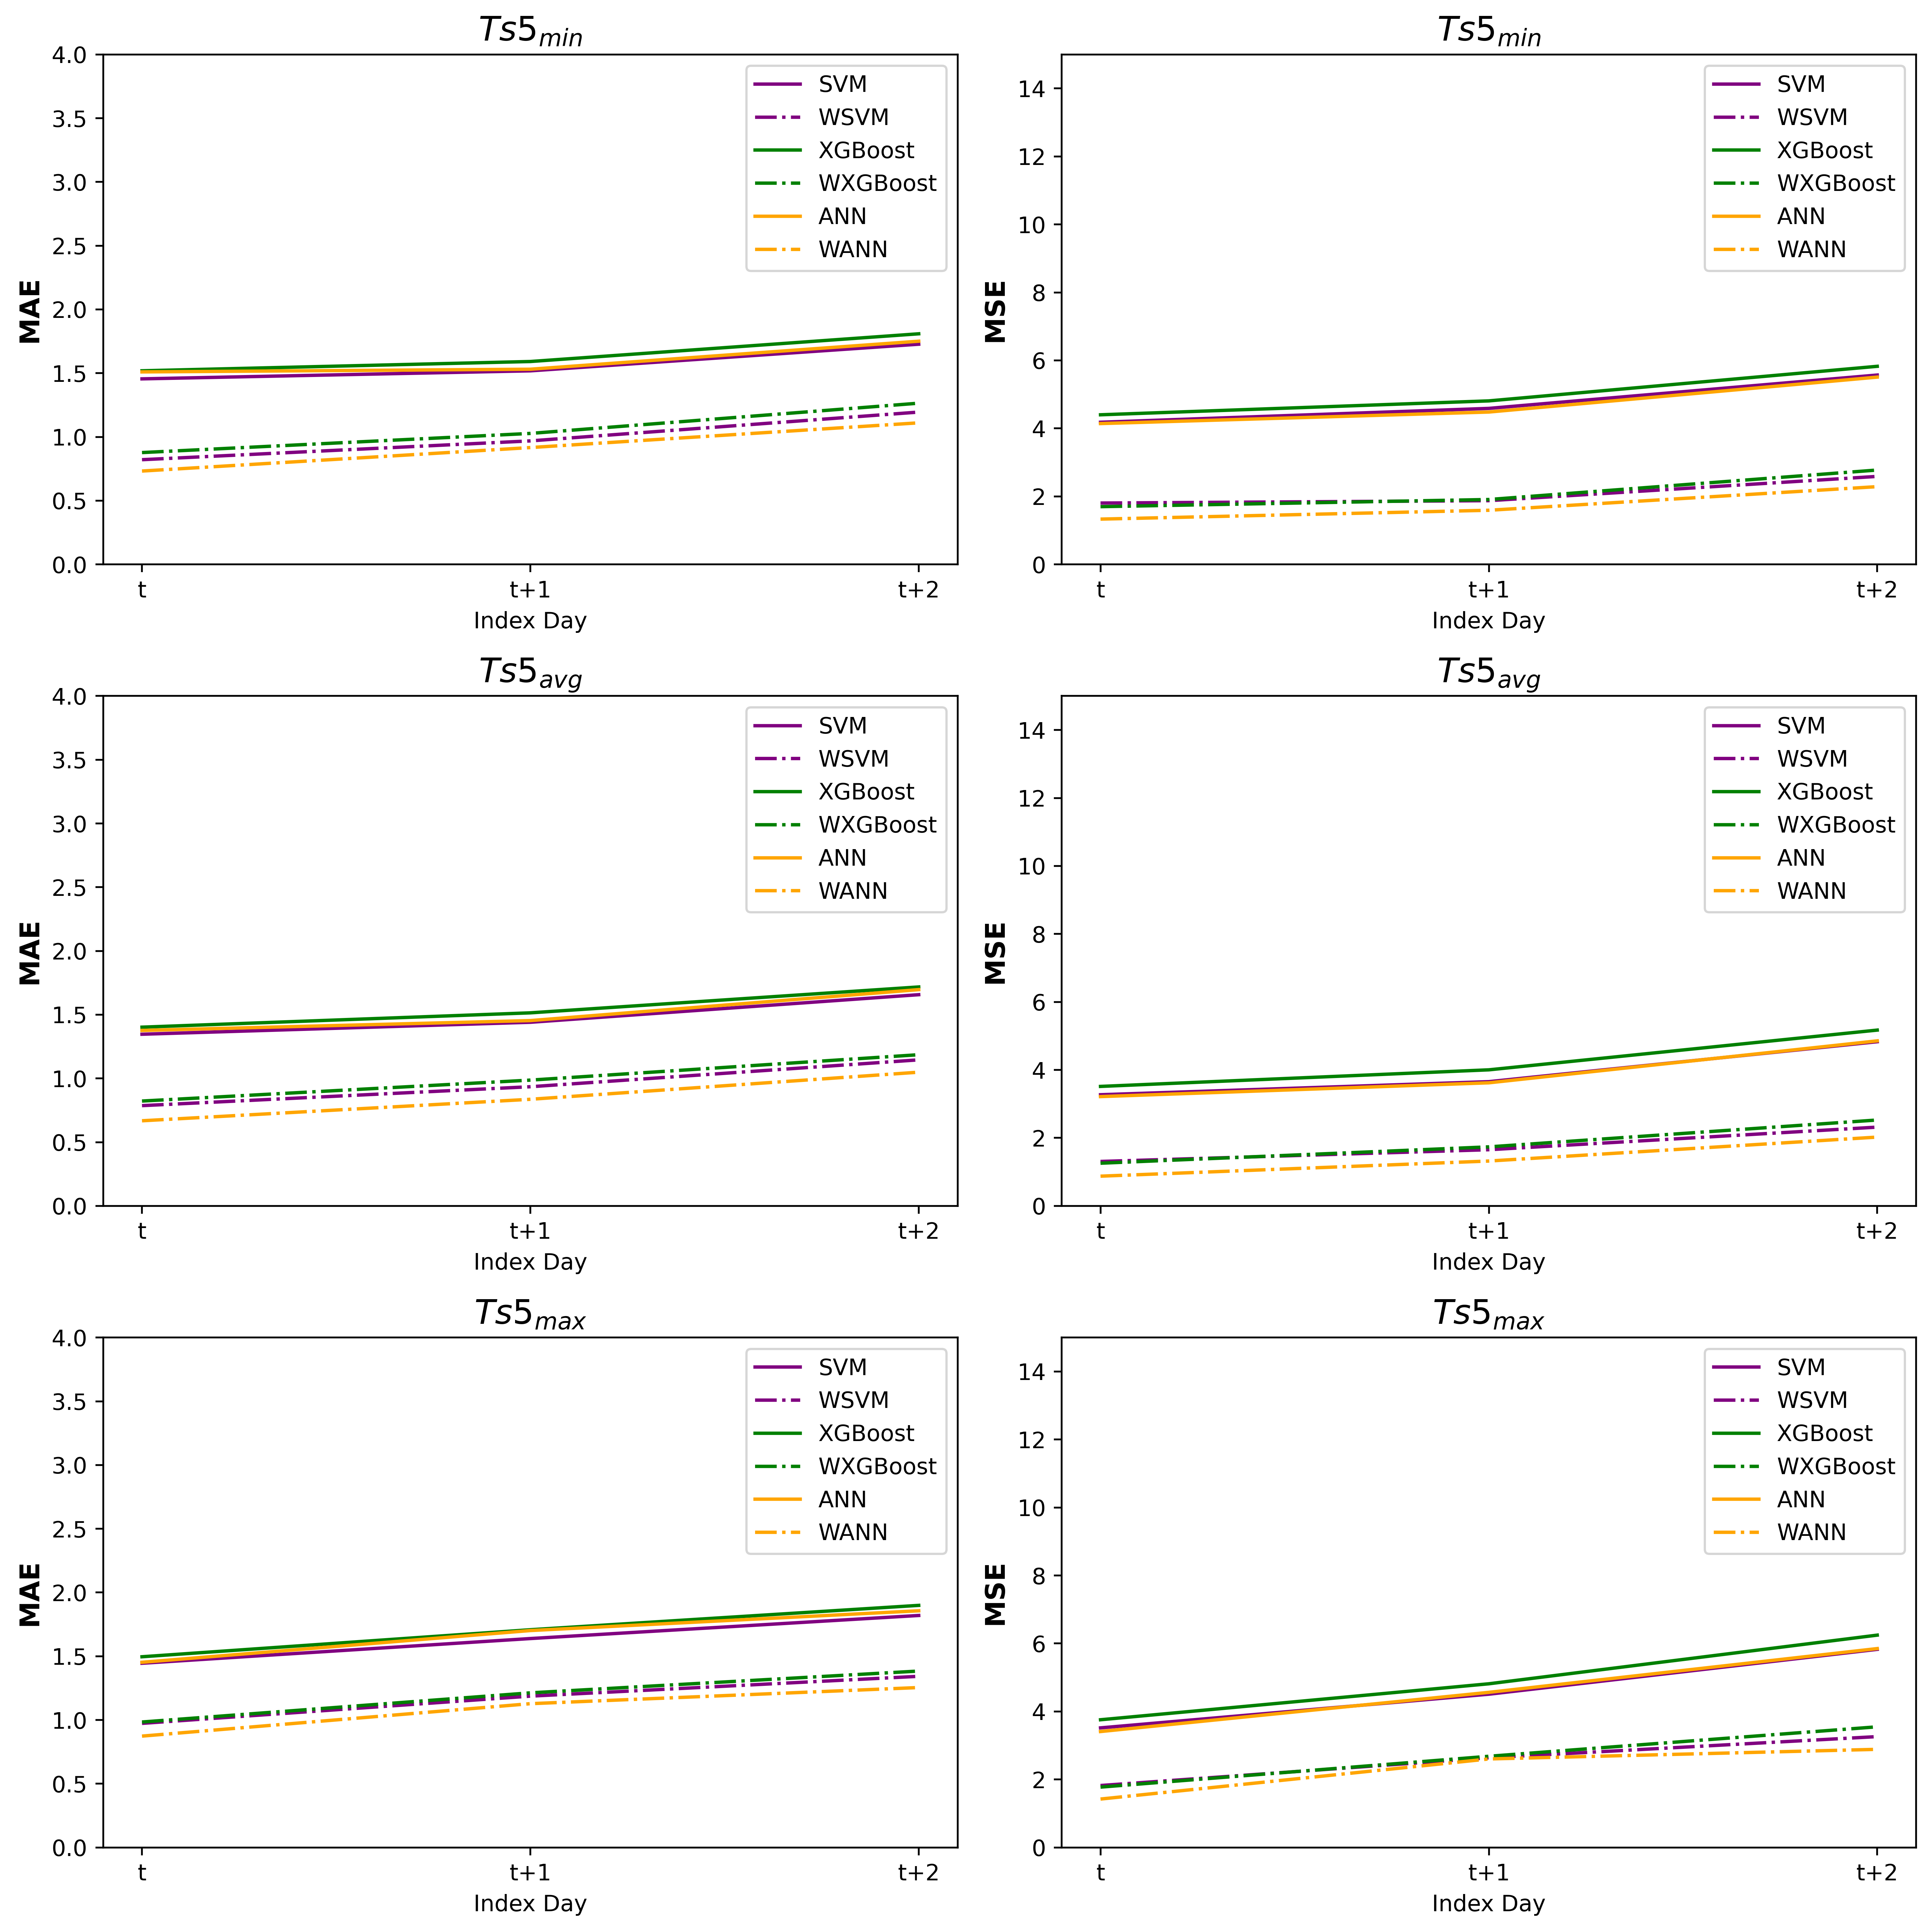

In [47]:
plt.figure(figsize = (12,12),dpi=500)
plt.subplot(3,2,1)
plt.plot(SVMvsWSVM_5cm_min[SVMvsWSVM_5cm_min["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_5cm_min[SVMvsWSVM_5cm_min["MLAlgo"] == "SVM"]["mae_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_5cm_min[SVMvsWSVM_5cm_min["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_5cm_min[SVMvsWSVM_5cm_min["MLAlgo"] == "WSVM"]["mae_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_5cm_min[XGBoostvsWXGBoost_5cm_min["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_5cm_min[XGBoostvsWXGBoost_5cm_min["MLAlgo"] == "XGBoost"]["mae_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_5cm_min[XGBoostvsWXGBoost_5cm_min["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_5cm_min[XGBoostvsWXGBoost_5cm_min["MLAlgo"] == "WXGBoost"]["mae_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_5cm_min[ANNvsWANN_5cm_min["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_5cm_min[ANNvsWANN_5cm_min["MLAlgo"] == "ANN"]["mae_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_5cm_min[ANNvsWANN_5cm_min["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_5cm_min[ANNvsWANN_5cm_min["MLAlgo"] == "WANN"]["mae_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts5_{min}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MAE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 4)


plt.subplot(3,2,2)
plt.plot(SVMvsWSVM_5cm_min[SVMvsWSVM_5cm_min["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_5cm_min[SVMvsWSVM_5cm_min["MLAlgo"] == "SVM"]["mse_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_5cm_min[SVMvsWSVM_5cm_min["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_5cm_min[SVMvsWSVM_5cm_min["MLAlgo"] == "WSVM"]["mse_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_5cm_min[XGBoostvsWXGBoost_5cm_min["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_5cm_min[XGBoostvsWXGBoost_5cm_min["MLAlgo"] == "XGBoost"]["mse_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_5cm_min[XGBoostvsWXGBoost_5cm_min["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_5cm_min[XGBoostvsWXGBoost_5cm_min["MLAlgo"] == "WXGBoost"]["mse_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_5cm_min[ANNvsWANN_5cm_min["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_5cm_min[ANNvsWANN_5cm_min["MLAlgo"] == "ANN"]["mse_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_5cm_min[ANNvsWANN_5cm_min["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_5cm_min[ANNvsWANN_5cm_min["MLAlgo"] == "WANN"]["mse_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts5_{min}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MSE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 15)


plt.subplot(3,2,3)
plt.plot(SVMvsWSVM_5cm_avg[SVMvsWSVM_5cm_avg["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_5cm_avg[SVMvsWSVM_5cm_avg["MLAlgo"] == "SVM"]["mae_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_5cm_avg[SVMvsWSVM_5cm_avg["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_5cm_avg[SVMvsWSVM_5cm_avg["MLAlgo"] == "WSVM"]["mae_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_5cm_avg[XGBoostvsWXGBoost_5cm_avg["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_5cm_avg[XGBoostvsWXGBoost_5cm_avg["MLAlgo"] == "XGBoost"]["mae_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_5cm_avg[XGBoostvsWXGBoost_5cm_avg["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_5cm_avg[XGBoostvsWXGBoost_5cm_avg["MLAlgo"] == "WXGBoost"]["mae_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_5cm_avg[ANNvsWANN_5cm_avg["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_5cm_avg[ANNvsWANN_5cm_avg["MLAlgo"] == "ANN"]["mae_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_5cm_avg[ANNvsWANN_5cm_avg["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_5cm_avg[ANNvsWANN_5cm_avg["MLAlgo"] == "WANN"]["mae_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts5_{avg}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MAE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 4)

plt.subplot(3,2,4)
plt.plot(SVMvsWSVM_5cm_avg[SVMvsWSVM_5cm_avg["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_5cm_avg[SVMvsWSVM_5cm_avg["MLAlgo"] == "SVM"]["mse_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_5cm_avg[SVMvsWSVM_5cm_avg["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_5cm_avg[SVMvsWSVM_5cm_avg["MLAlgo"] == "WSVM"]["mse_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_5cm_avg[XGBoostvsWXGBoost_5cm_avg["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_5cm_avg[XGBoostvsWXGBoost_5cm_avg["MLAlgo"] == "XGBoost"]["mse_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_5cm_avg[XGBoostvsWXGBoost_5cm_avg["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_5cm_avg[XGBoostvsWXGBoost_5cm_avg["MLAlgo"] == "WXGBoost"]["mse_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_5cm_avg[ANNvsWANN_5cm_avg["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_5cm_avg[ANNvsWANN_5cm_avg["MLAlgo"] == "ANN"]["mse_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_5cm_avg[ANNvsWANN_5cm_avg["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_5cm_avg[ANNvsWANN_5cm_avg["MLAlgo"] == "WANN"]["mse_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts5_{avg}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MSE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 15)

plt.subplot(3,2,5)
plt.plot(SVMvsWSVM_5cm_max[SVMvsWSVM_5cm_max["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_5cm_max[SVMvsWSVM_5cm_max["MLAlgo"] == "SVM"]["mae_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_5cm_max[SVMvsWSVM_5cm_max["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_5cm_max[SVMvsWSVM_5cm_max["MLAlgo"] == "WSVM"]["mae_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_5cm_max[XGBoostvsWXGBoost_5cm_max["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_5cm_max[XGBoostvsWXGBoost_5cm_max["MLAlgo"] == "XGBoost"]["mae_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_5cm_max[XGBoostvsWXGBoost_5cm_max["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_5cm_max[XGBoostvsWXGBoost_5cm_max["MLAlgo"] == "WXGBoost"]["mae_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_5cm_max[ANNvsWANN_5cm_max["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_5cm_max[ANNvsWANN_5cm_max["MLAlgo"] == "ANN"]["mae_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_5cm_max[ANNvsWANN_5cm_max["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_5cm_max[ANNvsWANN_5cm_max["MLAlgo"] == "WANN"]["mae_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts5_{max}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MAE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 4)

plt.subplot(3,2,6)
plt.plot(SVMvsWSVM_5cm_max[SVMvsWSVM_5cm_max["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_5cm_max[SVMvsWSVM_5cm_max["MLAlgo"] == "SVM"]["mse_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_5cm_max[SVMvsWSVM_5cm_max["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_5cm_max[SVMvsWSVM_5cm_max["MLAlgo"] == "WSVM"]["mse_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_5cm_max[XGBoostvsWXGBoost_5cm_max["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_5cm_max[XGBoostvsWXGBoost_5cm_max["MLAlgo"] == "XGBoost"]["mse_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_5cm_max[XGBoostvsWXGBoost_5cm_max["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_5cm_max[XGBoostvsWXGBoost_5cm_max["MLAlgo"] == "WXGBoost"]["mse_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_5cm_max[ANNvsWANN_5cm_max["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_5cm_max[ANNvsWANN_5cm_max["MLAlgo"] == "ANN"]["mse_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_5cm_max[ANNvsWANN_5cm_max["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_5cm_max[ANNvsWANN_5cm_max["MLAlgo"] == "WANN"]["mse_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts5_{max}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MSE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 15)

plt.tight_layout()
         

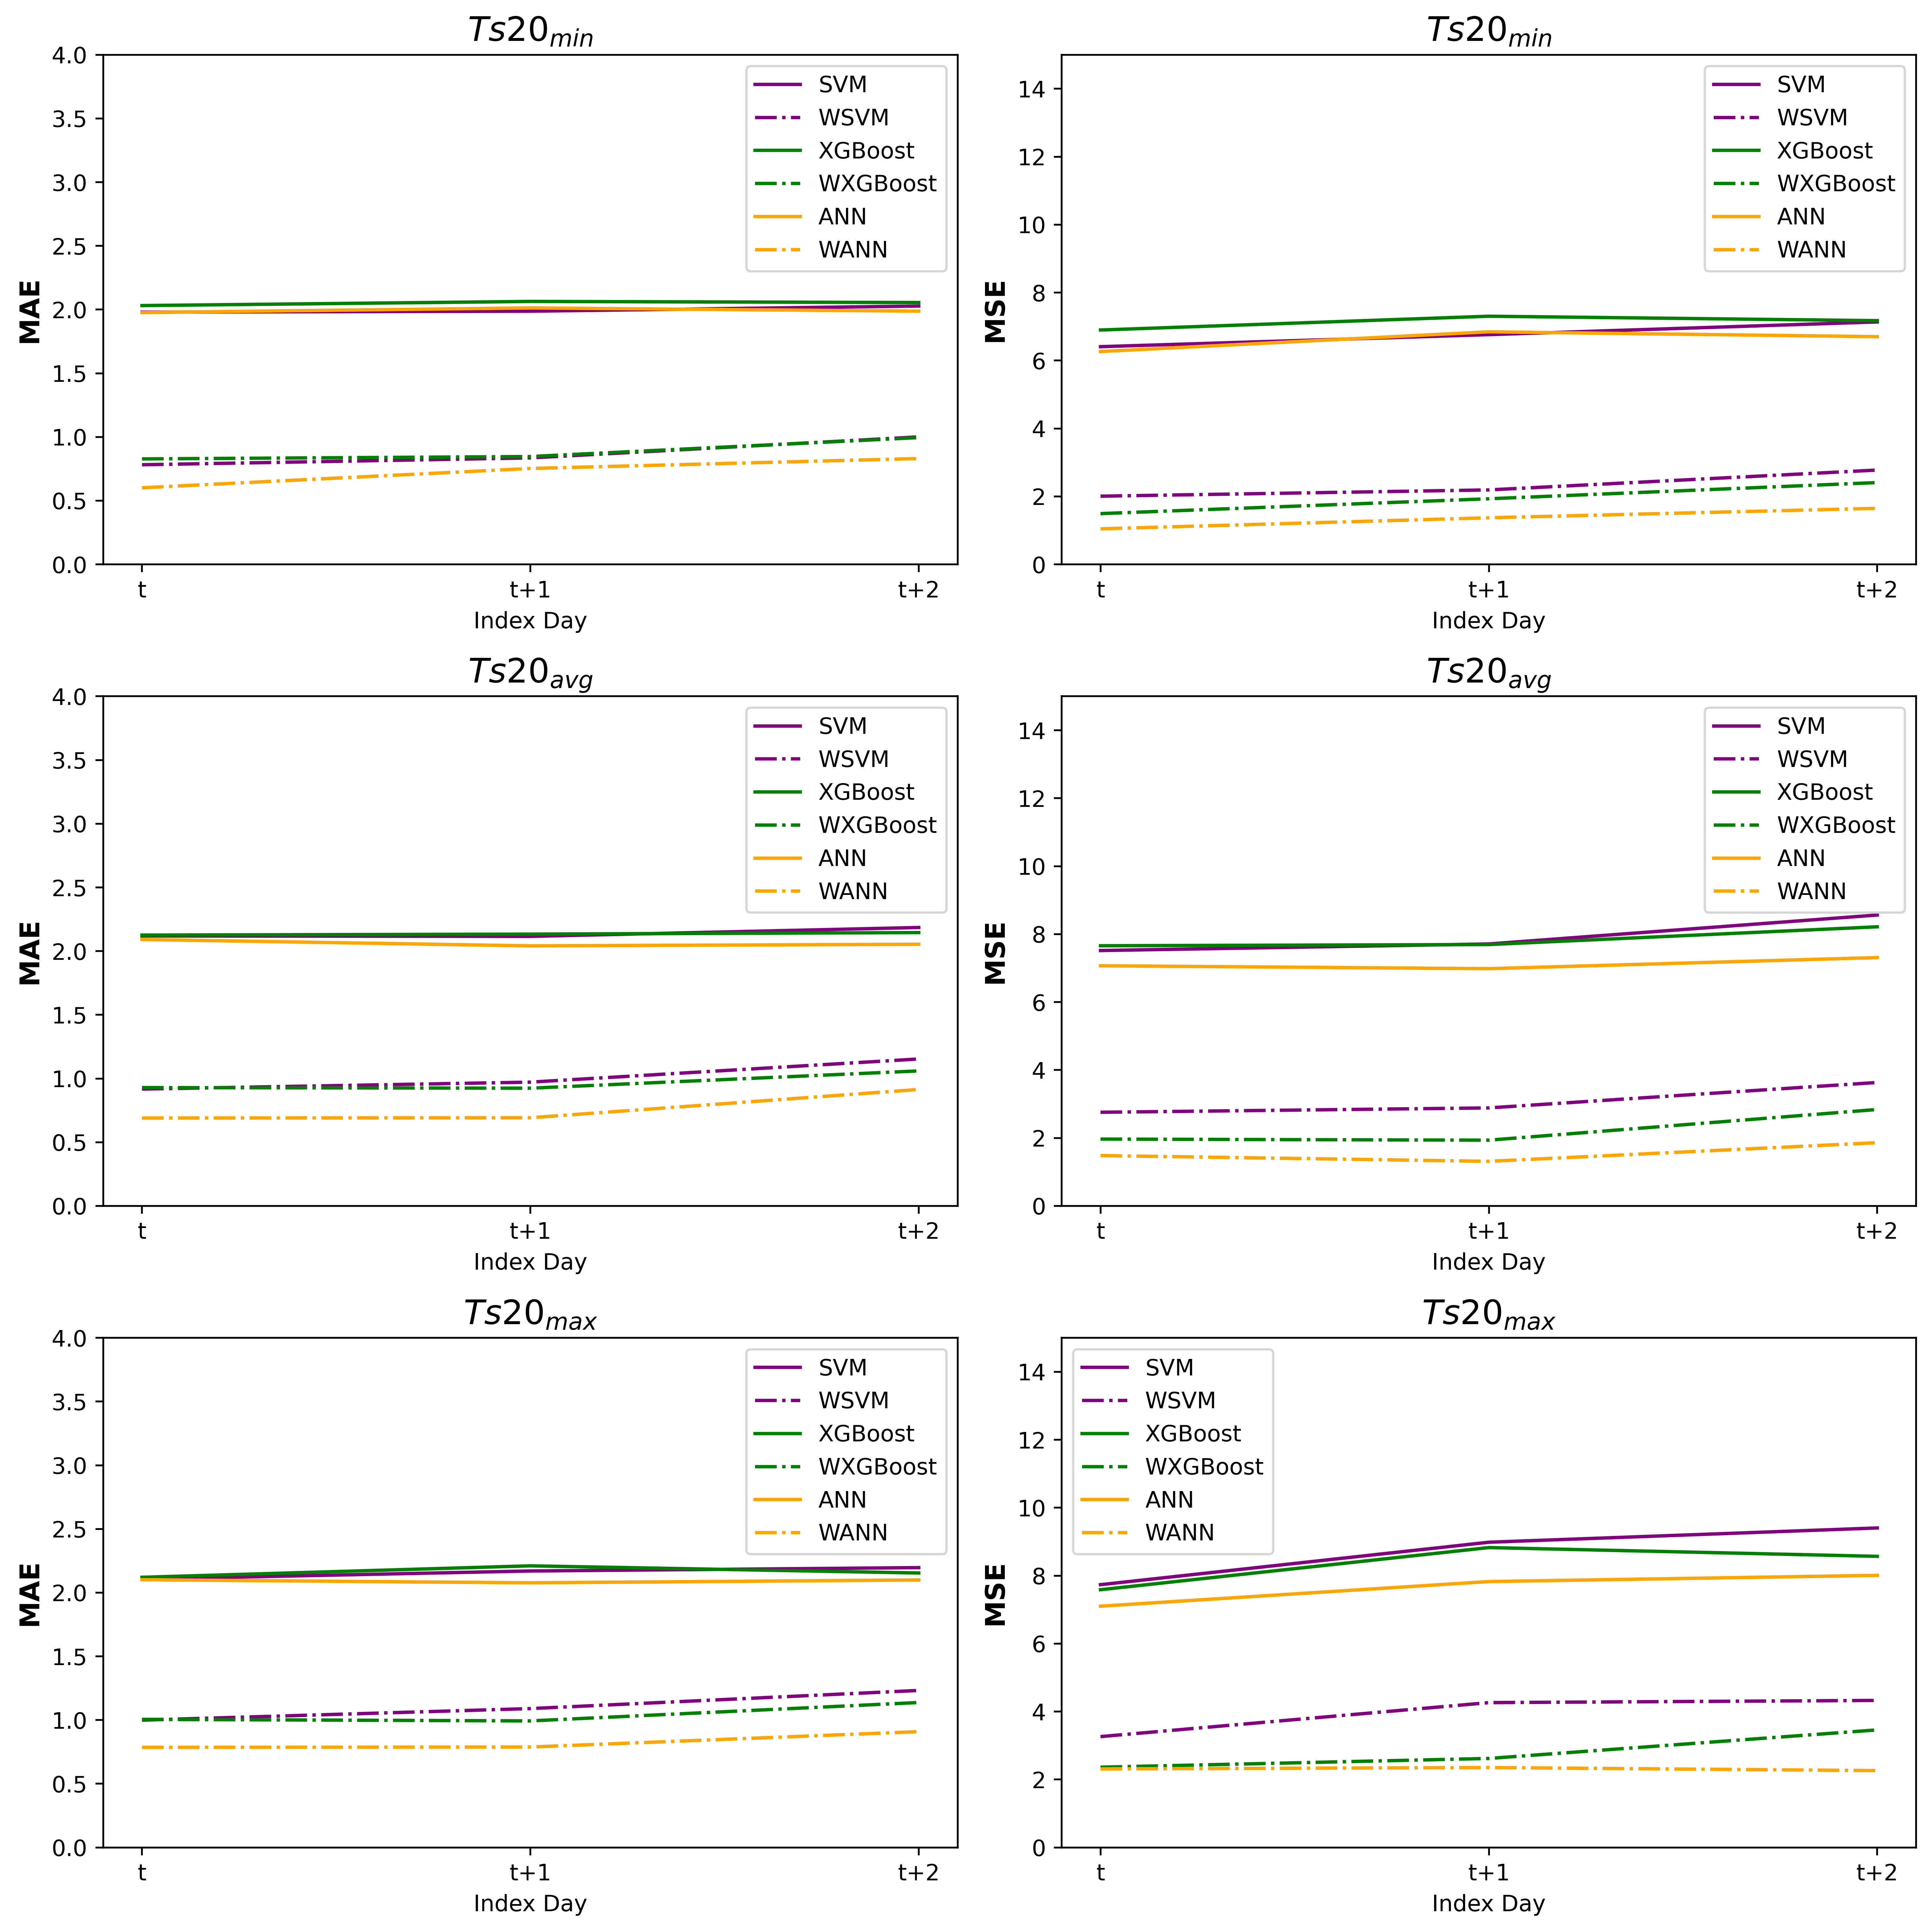

In [48]:
plt.figure(figsize = (12,12),dpi=500)
plt.subplot(3,2,1)
plt.plot(SVMvsWSVM_20cm_min[SVMvsWSVM_20cm_min["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_20cm_min[SVMvsWSVM_20cm_min["MLAlgo"] == "SVM"]["mae_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_20cm_min[SVMvsWSVM_20cm_min["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_20cm_min[SVMvsWSVM_20cm_min["MLAlgo"] == "WSVM"]["mae_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_20cm_min[XGBoostvsWXGBoost_20cm_min["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_20cm_min[XGBoostvsWXGBoost_20cm_min["MLAlgo"] == "XGBoost"]["mae_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_20cm_min[XGBoostvsWXGBoost_20cm_min["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_20cm_min[XGBoostvsWXGBoost_20cm_min["MLAlgo"] == "WXGBoost"]["mae_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_20cm_min[ANNvsWANN_20cm_min["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_20cm_min[ANNvsWANN_20cm_min["MLAlgo"] == "ANN"]["mae_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_20cm_min[ANNvsWANN_20cm_min["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_20cm_min[ANNvsWANN_20cm_min["MLAlgo"] == "WANN"]["mae_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts20_{min}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MAE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 4)


plt.subplot(3,2,2)
plt.plot(SVMvsWSVM_20cm_min[SVMvsWSVM_20cm_min["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_20cm_min[SVMvsWSVM_20cm_min["MLAlgo"] == "SVM"]["mse_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_20cm_min[SVMvsWSVM_20cm_min["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_20cm_min[SVMvsWSVM_20cm_min["MLAlgo"] == "WSVM"]["mse_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_20cm_min[XGBoostvsWXGBoost_20cm_min["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_20cm_min[XGBoostvsWXGBoost_20cm_min["MLAlgo"] == "XGBoost"]["mse_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_20cm_min[XGBoostvsWXGBoost_20cm_min["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_20cm_min[XGBoostvsWXGBoost_20cm_min["MLAlgo"] == "WXGBoost"]["mse_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_20cm_min[ANNvsWANN_20cm_min["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_20cm_min[ANNvsWANN_20cm_min["MLAlgo"] == "ANN"]["mse_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_20cm_min[ANNvsWANN_20cm_min["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_20cm_min[ANNvsWANN_20cm_min["MLAlgo"] == "WANN"]["mse_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts20_{min}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MSE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 15)


plt.subplot(3,2,3)
plt.plot(SVMvsWSVM_20cm_avg[SVMvsWSVM_20cm_avg["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_20cm_avg[SVMvsWSVM_20cm_avg["MLAlgo"] == "SVM"]["mae_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_20cm_avg[SVMvsWSVM_20cm_avg["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_20cm_avg[SVMvsWSVM_20cm_avg["MLAlgo"] == "WSVM"]["mae_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_20cm_avg[XGBoostvsWXGBoost_20cm_avg["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_20cm_avg[XGBoostvsWXGBoost_20cm_avg["MLAlgo"] == "XGBoost"]["mae_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_20cm_avg[XGBoostvsWXGBoost_20cm_avg["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_20cm_avg[XGBoostvsWXGBoost_20cm_avg["MLAlgo"] == "WXGBoost"]["mae_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_20cm_avg[ANNvsWANN_20cm_avg["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_20cm_avg[ANNvsWANN_20cm_avg["MLAlgo"] == "ANN"]["mae_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_20cm_avg[ANNvsWANN_20cm_avg["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_20cm_avg[ANNvsWANN_20cm_avg["MLAlgo"] == "WANN"]["mae_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts20_{avg}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MAE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 4)


plt.subplot(3,2,4)
plt.plot(SVMvsWSVM_20cm_avg[SVMvsWSVM_20cm_avg["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_20cm_avg[SVMvsWSVM_20cm_avg["MLAlgo"] == "SVM"]["mse_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_20cm_avg[SVMvsWSVM_20cm_avg["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_20cm_avg[SVMvsWSVM_20cm_avg["MLAlgo"] == "WSVM"]["mse_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_20cm_avg[XGBoostvsWXGBoost_20cm_avg["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_20cm_avg[XGBoostvsWXGBoost_20cm_avg["MLAlgo"] == "XGBoost"]["mse_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_20cm_avg[XGBoostvsWXGBoost_20cm_avg["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_20cm_avg[XGBoostvsWXGBoost_20cm_avg["MLAlgo"] == "WXGBoost"]["mse_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_20cm_avg[ANNvsWANN_20cm_avg["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_20cm_avg[ANNvsWANN_20cm_avg["MLAlgo"] == "ANN"]["mse_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_20cm_avg[ANNvsWANN_20cm_avg["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_20cm_avg[ANNvsWANN_20cm_avg["MLAlgo"] == "WANN"]["mse_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts20_{avg}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MSE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 15)

plt.subplot(3,2,5)
plt.plot(SVMvsWSVM_20cm_max[SVMvsWSVM_20cm_max["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_20cm_max[SVMvsWSVM_20cm_max["MLAlgo"] == "SVM"]["mae_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_20cm_max[SVMvsWSVM_20cm_max["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_20cm_max[SVMvsWSVM_20cm_max["MLAlgo"] == "WSVM"]["mae_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_20cm_max[XGBoostvsWXGBoost_20cm_max["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_20cm_max[XGBoostvsWXGBoost_20cm_max["MLAlgo"] == "XGBoost"]["mae_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_20cm_max[XGBoostvsWXGBoost_20cm_max["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_20cm_max[XGBoostvsWXGBoost_20cm_max["MLAlgo"] == "WXGBoost"]["mae_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_20cm_max[ANNvsWANN_20cm_max["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_20cm_max[ANNvsWANN_20cm_max["MLAlgo"] == "ANN"]["mae_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_20cm_max[ANNvsWANN_20cm_max["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_20cm_max[ANNvsWANN_20cm_max["MLAlgo"] == "WANN"]["mae_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts20_{max}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MAE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 4)

plt.subplot(3,2,6)
plt.plot(SVMvsWSVM_20cm_max[SVMvsWSVM_20cm_max["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_20cm_max[SVMvsWSVM_20cm_max["MLAlgo"] == "SVM"]["mse_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_20cm_max[SVMvsWSVM_20cm_max["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_20cm_max[SVMvsWSVM_20cm_max["MLAlgo"] == "WSVM"]["mse_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_20cm_max[XGBoostvsWXGBoost_20cm_max["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_20cm_max[XGBoostvsWXGBoost_20cm_max["MLAlgo"] == "XGBoost"]["mse_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_20cm_max[XGBoostvsWXGBoost_20cm_max["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_20cm_max[XGBoostvsWXGBoost_20cm_max["MLAlgo"] == "WXGBoost"]["mse_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_20cm_max[ANNvsWANN_20cm_max["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_20cm_max[ANNvsWANN_20cm_max["MLAlgo"] == "ANN"]["mse_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_20cm_max[ANNvsWANN_20cm_max["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_20cm_max[ANNvsWANN_20cm_max["MLAlgo"] == "WANN"]["mse_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts20_{max}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MSE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 15)


plt.tight_layout()
         

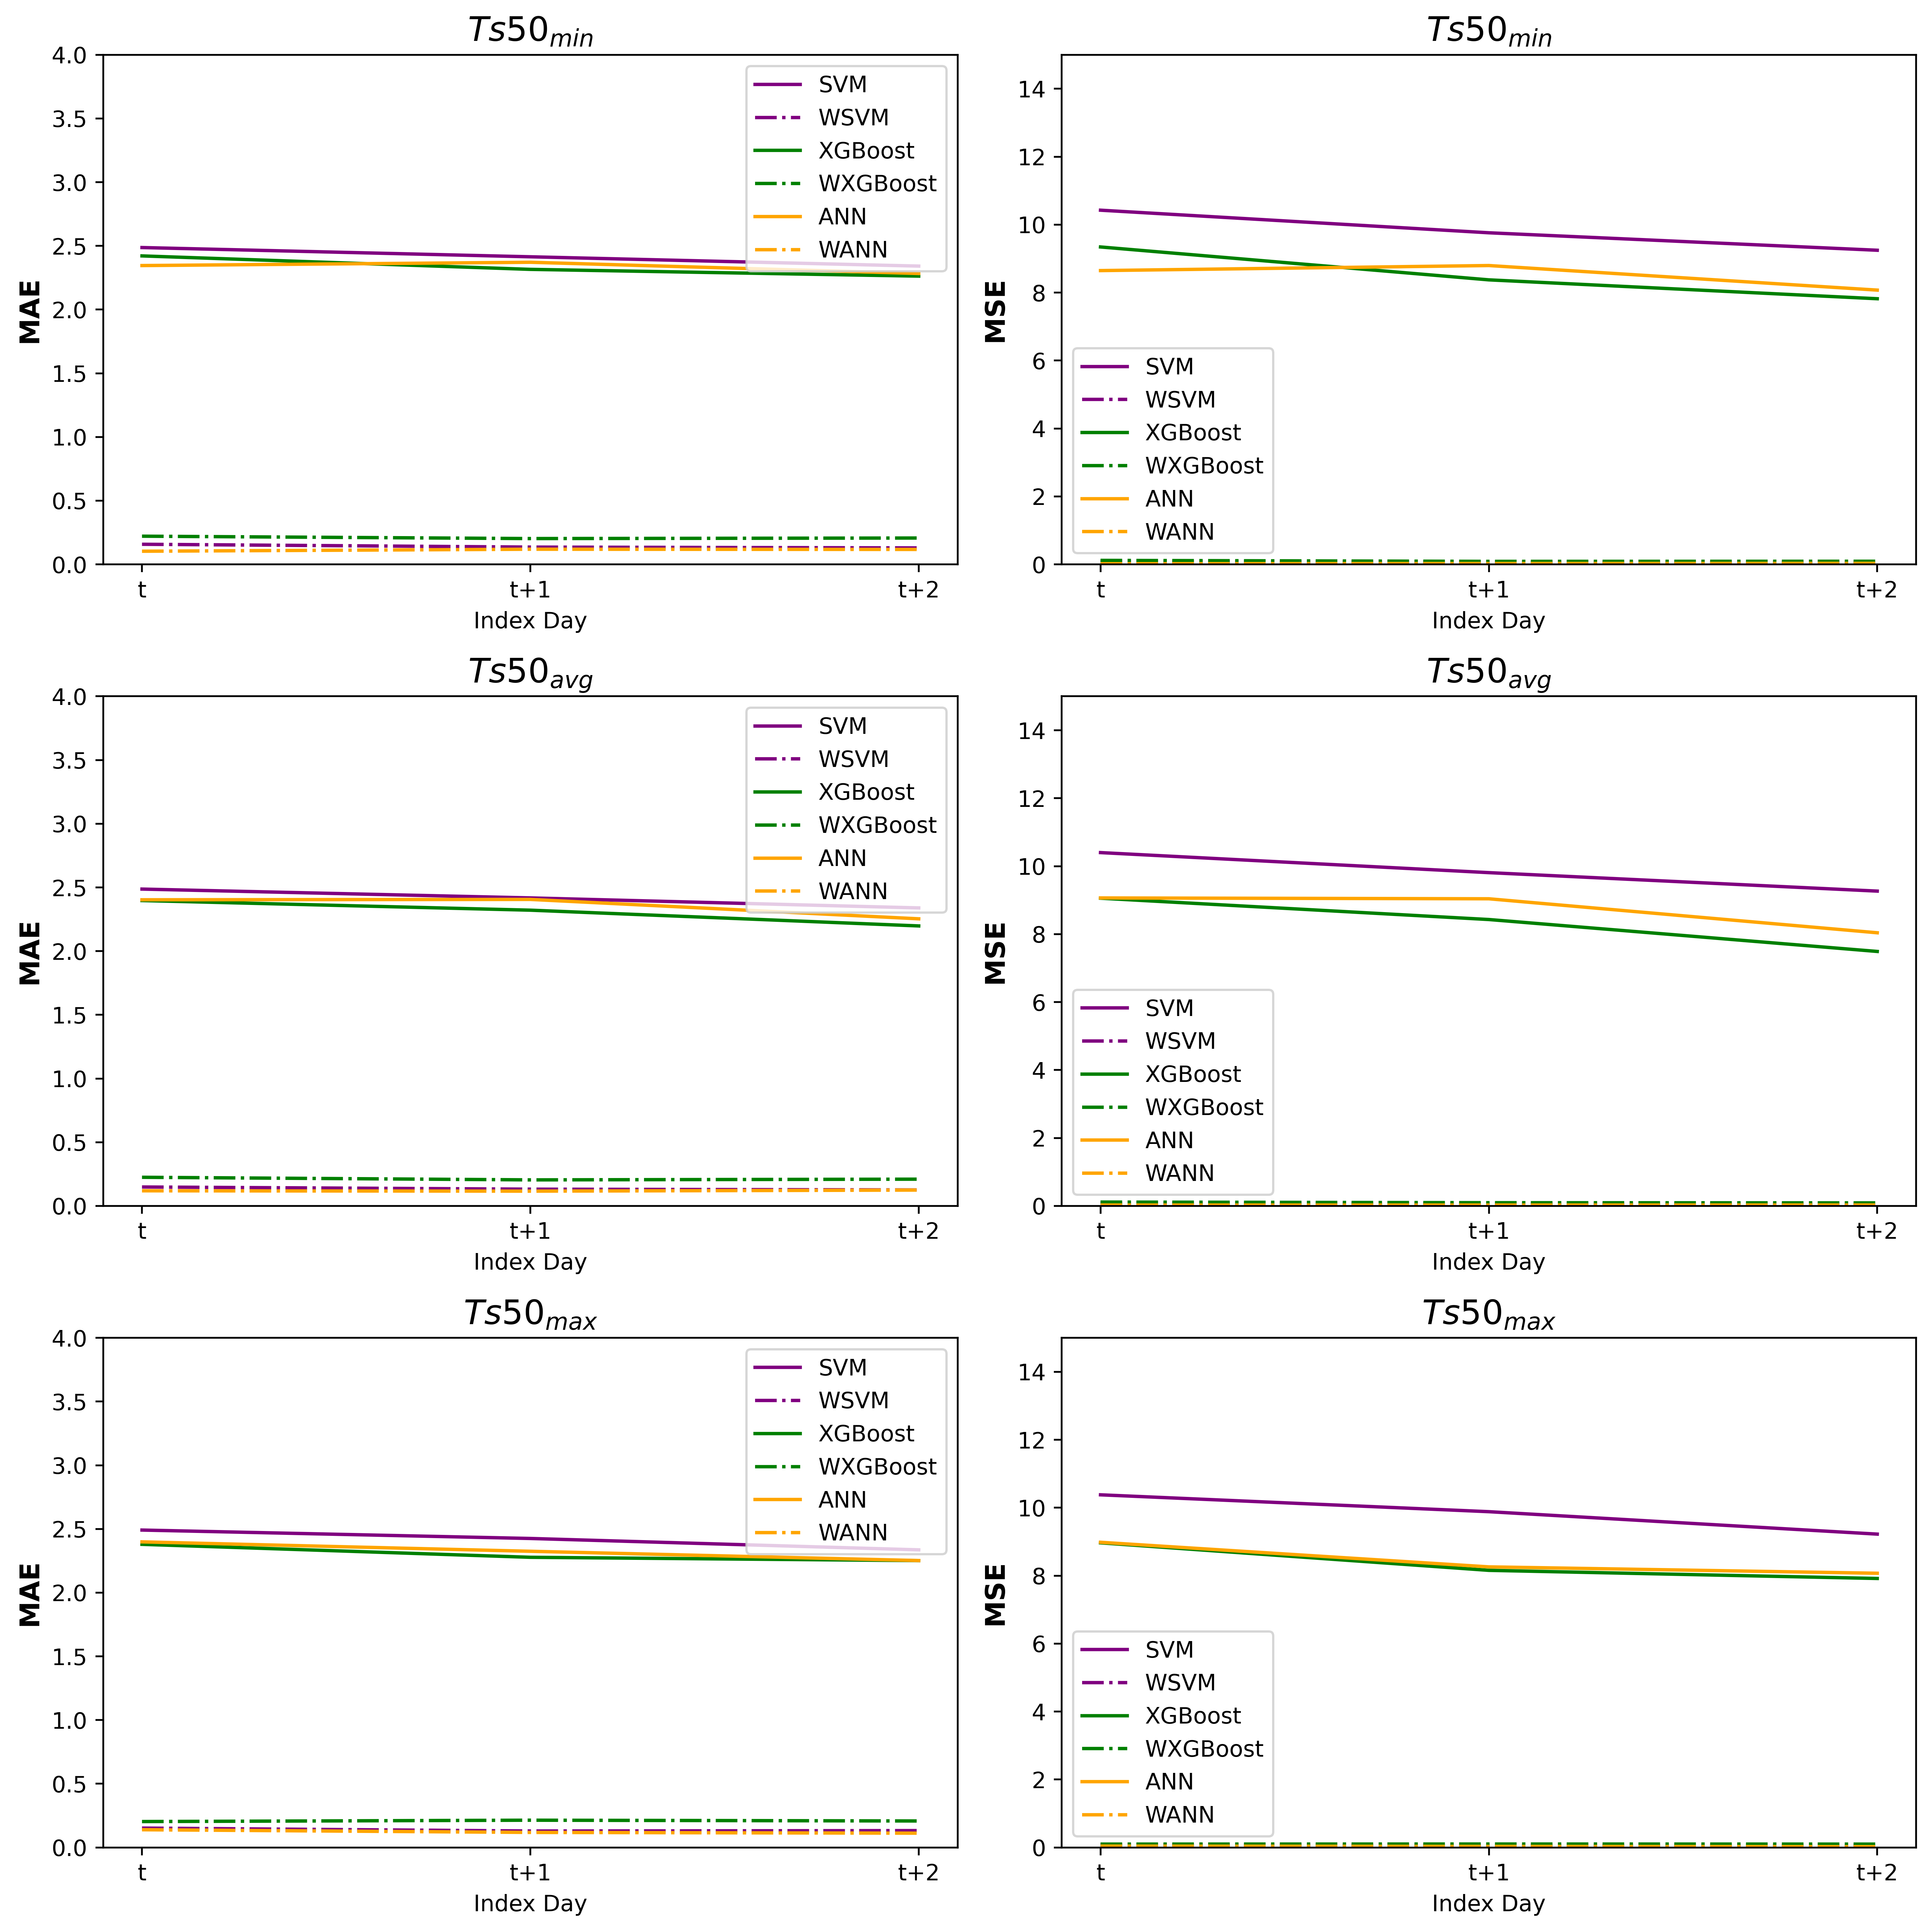

In [49]:
plt.figure(figsize = (12,12),dpi=500)
plt.subplot(3,2,1)
plt.plot(SVMvsWSVM_50cm_min[SVMvsWSVM_50cm_min["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_50cm_min[SVMvsWSVM_50cm_min["MLAlgo"] == "SVM"]["mae_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_50cm_min[SVMvsWSVM_50cm_min["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_50cm_min[SVMvsWSVM_50cm_min["MLAlgo"] == "WSVM"]["mae_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_50cm_min[XGBoostvsWXGBoost_50cm_min["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_50cm_min[XGBoostvsWXGBoost_50cm_min["MLAlgo"] == "XGBoost"]["mae_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_50cm_min[XGBoostvsWXGBoost_50cm_min["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_50cm_min[XGBoostvsWXGBoost_50cm_min["MLAlgo"] == "WXGBoost"]["mae_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_50cm_min[ANNvsWANN_50cm_min["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_50cm_min[ANNvsWANN_50cm_min["MLAlgo"] == "ANN"]["mae_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_50cm_min[ANNvsWANN_50cm_min["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_50cm_min[ANNvsWANN_50cm_min["MLAlgo"] == "WANN"]["mae_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts50_{min}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MAE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 4)


plt.subplot(3,2,2)
plt.plot(SVMvsWSVM_50cm_min[SVMvsWSVM_50cm_min["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_50cm_min[SVMvsWSVM_50cm_min["MLAlgo"] == "SVM"]["mse_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_50cm_min[SVMvsWSVM_50cm_min["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_50cm_min[SVMvsWSVM_50cm_min["MLAlgo"] == "WSVM"]["mse_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_50cm_min[XGBoostvsWXGBoost_50cm_min["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_50cm_min[XGBoostvsWXGBoost_50cm_min["MLAlgo"] == "XGBoost"]["mse_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_50cm_min[XGBoostvsWXGBoost_50cm_min["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_50cm_min[XGBoostvsWXGBoost_50cm_min["MLAlgo"] == "WXGBoost"]["mse_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_50cm_min[ANNvsWANN_50cm_min["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_50cm_min[ANNvsWANN_50cm_min["MLAlgo"] == "ANN"]["mse_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_50cm_min[ANNvsWANN_50cm_min["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_50cm_min[ANNvsWANN_50cm_min["MLAlgo"] == "WANN"]["mse_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts50_{min}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MSE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 15)


plt.subplot(3,2,3)
plt.plot(SVMvsWSVM_50cm_avg[SVMvsWSVM_50cm_avg["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_50cm_avg[SVMvsWSVM_50cm_avg["MLAlgo"] == "SVM"]["mae_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_50cm_avg[SVMvsWSVM_50cm_avg["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_50cm_avg[SVMvsWSVM_50cm_avg["MLAlgo"] == "WSVM"]["mae_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_50cm_avg[XGBoostvsWXGBoost_50cm_avg["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_50cm_avg[XGBoostvsWXGBoost_50cm_avg["MLAlgo"] == "XGBoost"]["mae_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_50cm_avg[XGBoostvsWXGBoost_50cm_avg["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_50cm_avg[XGBoostvsWXGBoost_50cm_avg["MLAlgo"] == "WXGBoost"]["mae_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_50cm_avg[ANNvsWANN_50cm_avg["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_50cm_avg[ANNvsWANN_50cm_avg["MLAlgo"] == "ANN"]["mae_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_50cm_avg[ANNvsWANN_50cm_avg["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_50cm_avg[ANNvsWANN_50cm_avg["MLAlgo"] == "WANN"]["mae_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts50_{avg}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MAE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 4)

plt.subplot(3,2,4)
plt.plot(SVMvsWSVM_50cm_avg[SVMvsWSVM_50cm_avg["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_50cm_avg[SVMvsWSVM_50cm_avg["MLAlgo"] == "SVM"]["mse_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_50cm_avg[SVMvsWSVM_50cm_avg["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_50cm_avg[SVMvsWSVM_50cm_avg["MLAlgo"] == "WSVM"]["mse_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_50cm_avg[XGBoostvsWXGBoost_50cm_avg["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_50cm_avg[XGBoostvsWXGBoost_50cm_avg["MLAlgo"] == "XGBoost"]["mse_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_50cm_avg[XGBoostvsWXGBoost_50cm_avg["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_50cm_avg[XGBoostvsWXGBoost_50cm_avg["MLAlgo"] == "WXGBoost"]["mse_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_50cm_avg[ANNvsWANN_50cm_avg["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_50cm_avg[ANNvsWANN_50cm_avg["MLAlgo"] == "ANN"]["mse_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_50cm_avg[ANNvsWANN_50cm_avg["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_50cm_avg[ANNvsWANN_50cm_avg["MLAlgo"] == "WANN"]["mse_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts50_{avg}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MSE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 15)

plt.subplot(3,2,5)
plt.plot(SVMvsWSVM_50cm_max[SVMvsWSVM_50cm_max["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_50cm_max[SVMvsWSVM_50cm_max["MLAlgo"] == "SVM"]["mae_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_50cm_max[SVMvsWSVM_50cm_max["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_50cm_max[SVMvsWSVM_50cm_max["MLAlgo"] == "WSVM"]["mae_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_50cm_max[XGBoostvsWXGBoost_50cm_max["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_50cm_max[XGBoostvsWXGBoost_50cm_max["MLAlgo"] == "XGBoost"]["mae_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_50cm_max[XGBoostvsWXGBoost_50cm_max["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_50cm_max[XGBoostvsWXGBoost_50cm_max["MLAlgo"] == "WXGBoost"]["mae_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_50cm_max[ANNvsWANN_50cm_max["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_50cm_max[ANNvsWANN_50cm_max["MLAlgo"] == "ANN"]["mae_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_50cm_max[ANNvsWANN_50cm_max["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_50cm_max[ANNvsWANN_50cm_max["MLAlgo"] == "WANN"]["mae_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts50_{max}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MAE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 4)

plt.subplot(3,2,6)
plt.plot(SVMvsWSVM_50cm_max[SVMvsWSVM_50cm_max["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_50cm_max[SVMvsWSVM_50cm_max["MLAlgo"] == "SVM"]["mse_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_50cm_max[SVMvsWSVM_50cm_max["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_50cm_max[SVMvsWSVM_50cm_max["MLAlgo"] == "WSVM"]["mse_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_50cm_max[XGBoostvsWXGBoost_50cm_max["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_50cm_max[XGBoostvsWXGBoost_50cm_max["MLAlgo"] == "XGBoost"]["mse_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_50cm_max[XGBoostvsWXGBoost_50cm_max["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_50cm_max[XGBoostvsWXGBoost_50cm_max["MLAlgo"] == "WXGBoost"]["mse_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_50cm_max[ANNvsWANN_50cm_max["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_50cm_max[ANNvsWANN_50cm_max["MLAlgo"] == "ANN"]["mse_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_50cm_max[ANNvsWANN_50cm_max["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_50cm_max[ANNvsWANN_50cm_max["MLAlgo"] == "WANN"]["mse_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts50_{max}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MSE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 15)

plt.legend()
plt.tight_layout()
         

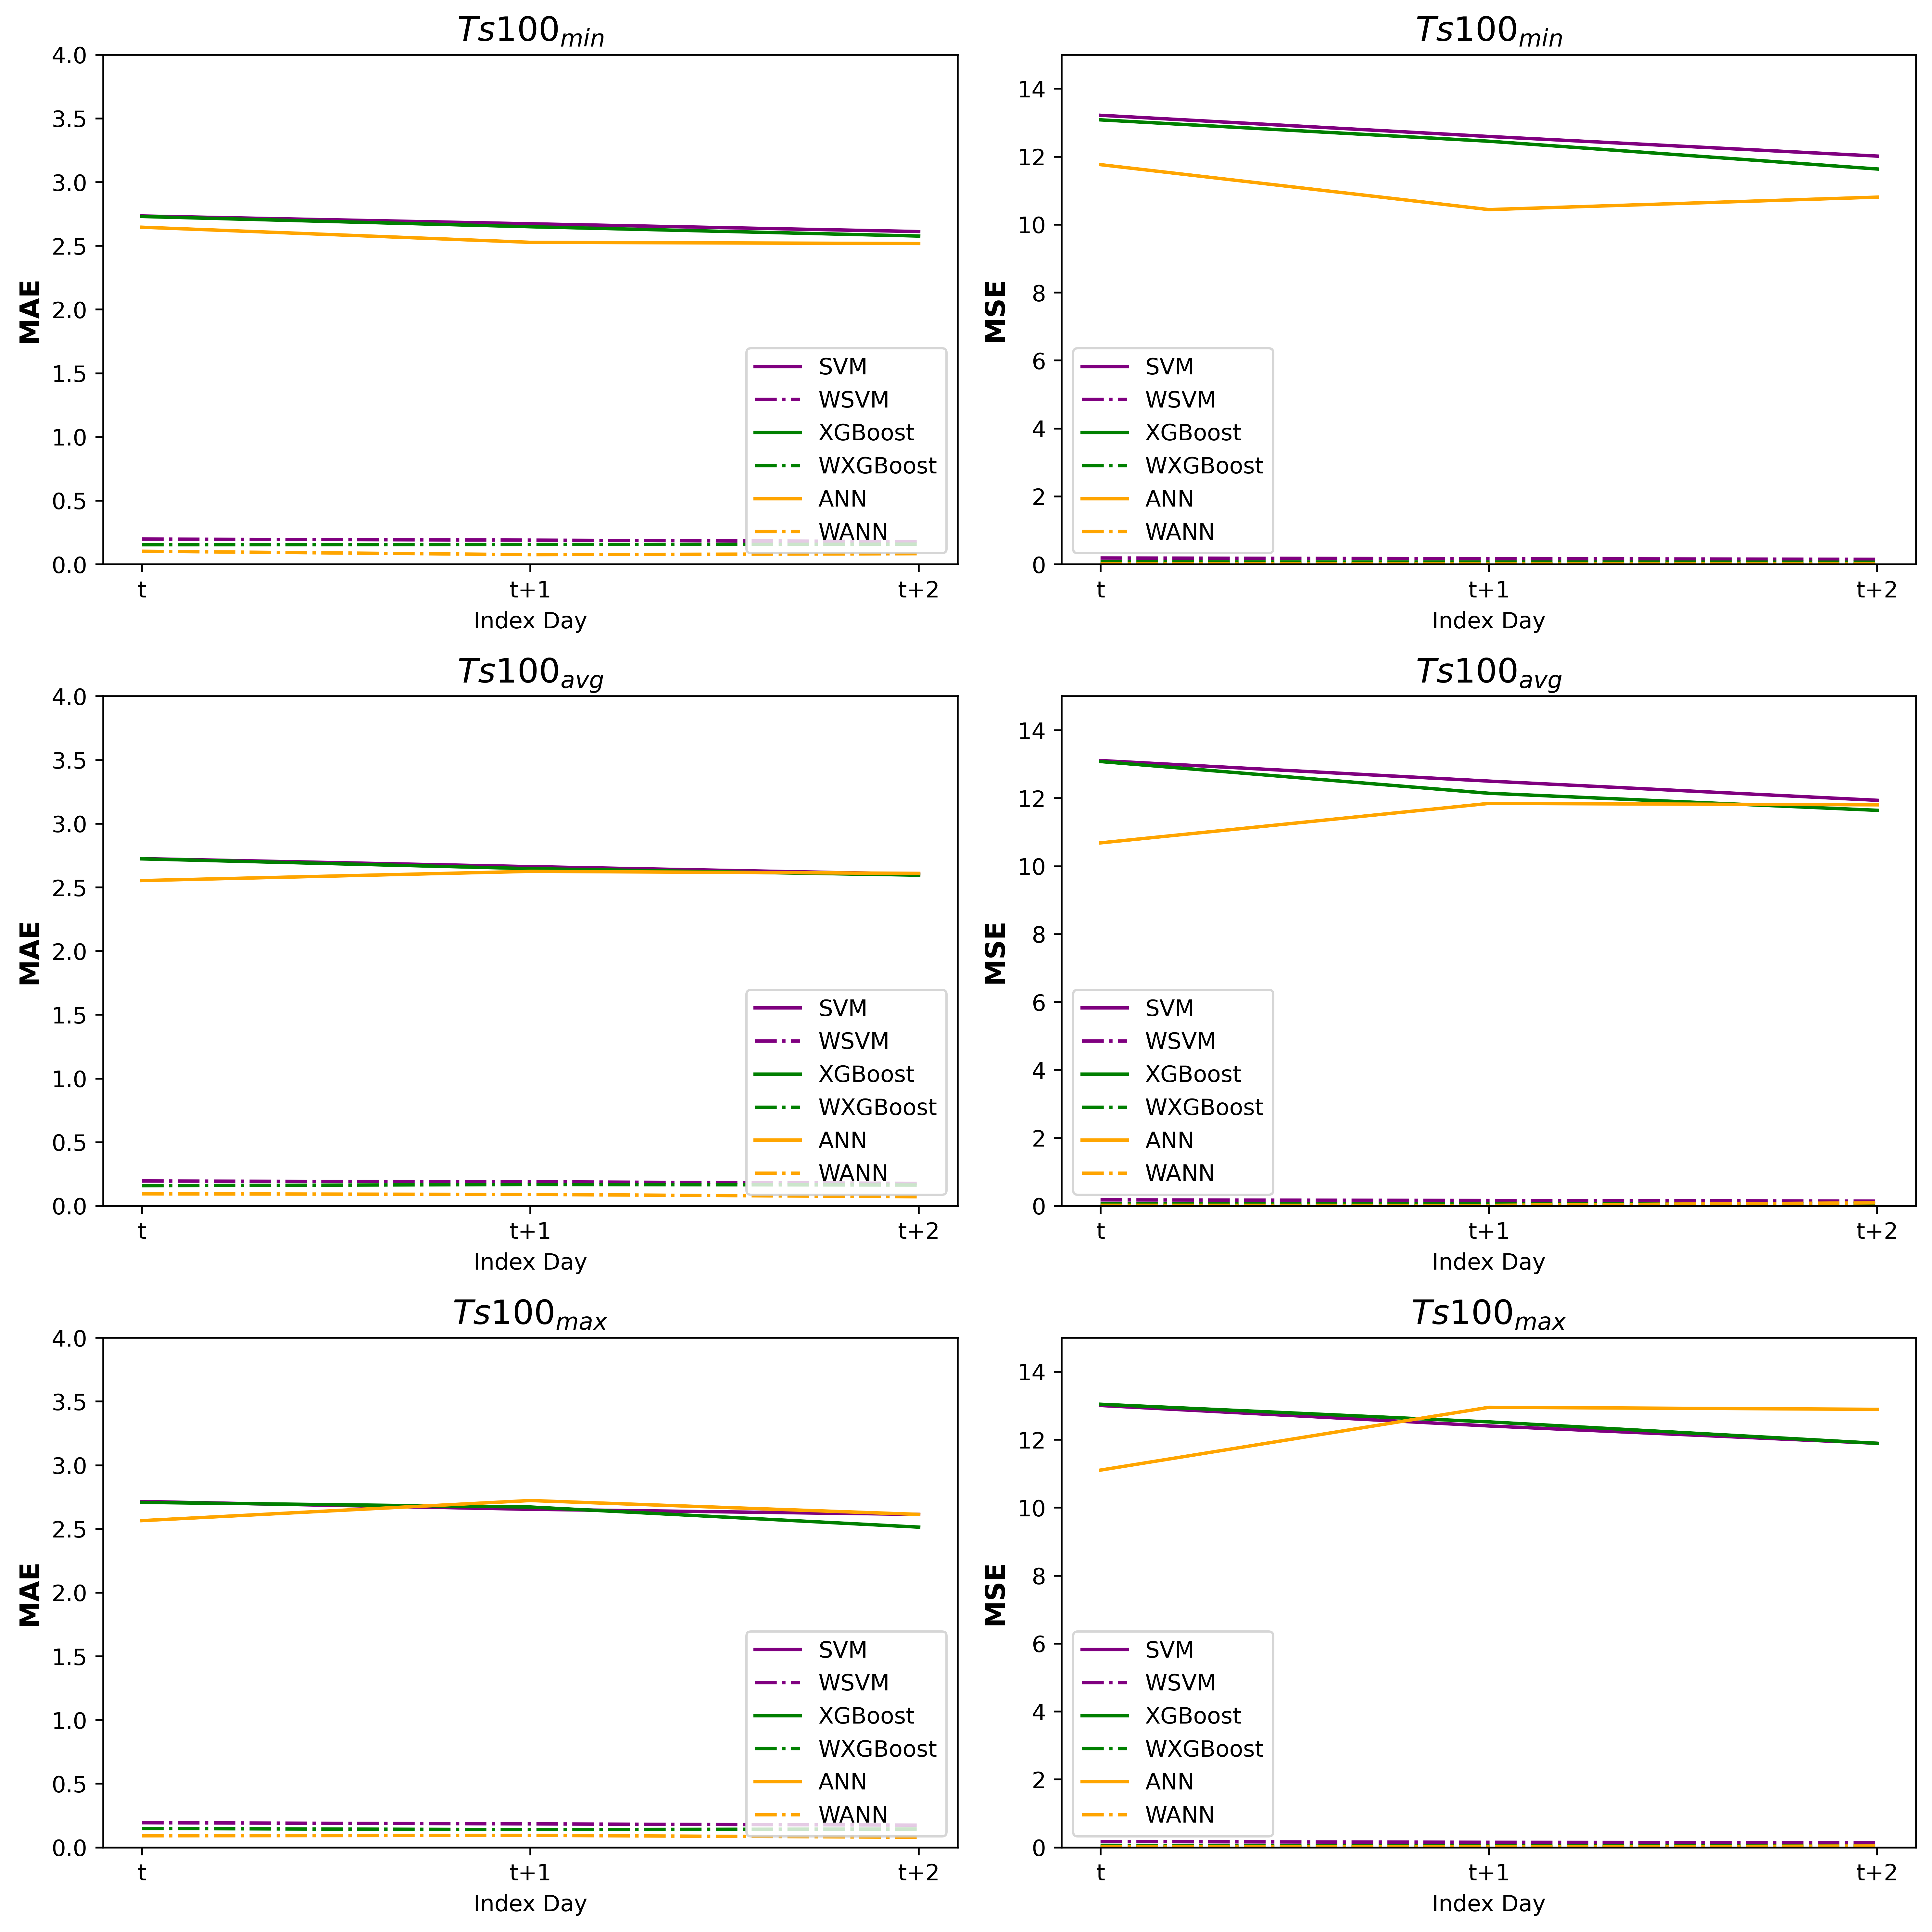

In [50]:
plt.figure(figsize = (12,12),dpi=500)
plt.subplot(3,2,1)
plt.plot(SVMvsWSVM_100cm_min[SVMvsWSVM_100cm_min["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_100cm_min[SVMvsWSVM_100cm_min["MLAlgo"] == "SVM"]["mae_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_100cm_min[SVMvsWSVM_100cm_min["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_100cm_min[SVMvsWSVM_100cm_min["MLAlgo"] == "WSVM"]["mae_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_100cm_min[XGBoostvsWXGBoost_100cm_min["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_100cm_min[XGBoostvsWXGBoost_100cm_min["MLAlgo"] == "XGBoost"]["mae_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_100cm_min[XGBoostvsWXGBoost_100cm_min["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_100cm_min[XGBoostvsWXGBoost_100cm_min["MLAlgo"] == "WXGBoost"]["mae_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_100cm_min[ANNvsWANN_100cm_min["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_100cm_min[ANNvsWANN_100cm_min["MLAlgo"] == "ANN"]["mae_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_100cm_min[ANNvsWANN_100cm_min["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_100cm_min[ANNvsWANN_100cm_min["MLAlgo"] == "WANN"]["mae_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts100_{min}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MAE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 4)


plt.subplot(3,2,2)
plt.plot(SVMvsWSVM_100cm_min[SVMvsWSVM_100cm_min["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_100cm_min[SVMvsWSVM_100cm_min["MLAlgo"] == "SVM"]["mse_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_100cm_min[SVMvsWSVM_100cm_min["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_100cm_min[SVMvsWSVM_100cm_min["MLAlgo"] == "WSVM"]["mse_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_100cm_min[XGBoostvsWXGBoost_100cm_min["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_100cm_min[XGBoostvsWXGBoost_100cm_min["MLAlgo"] == "XGBoost"]["mse_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_100cm_min[XGBoostvsWXGBoost_100cm_min["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_100cm_min[XGBoostvsWXGBoost_100cm_min["MLAlgo"] == "WXGBoost"]["mse_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_100cm_min[ANNvsWANN_100cm_min["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_100cm_min[ANNvsWANN_100cm_min["MLAlgo"] == "ANN"]["mse_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_100cm_min[ANNvsWANN_100cm_min["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_100cm_min[ANNvsWANN_100cm_min["MLAlgo"] == "WANN"]["mse_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts100_{min}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MSE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 15)


plt.subplot(3,2,3)
plt.plot(SVMvsWSVM_100cm_avg[SVMvsWSVM_100cm_avg["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_100cm_avg[SVMvsWSVM_100cm_avg["MLAlgo"] == "SVM"]["mae_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_100cm_avg[SVMvsWSVM_100cm_avg["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_100cm_avg[SVMvsWSVM_100cm_avg["MLAlgo"] == "WSVM"]["mae_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_100cm_avg[XGBoostvsWXGBoost_100cm_avg["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_100cm_avg[XGBoostvsWXGBoost_100cm_avg["MLAlgo"] == "XGBoost"]["mae_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_100cm_avg[XGBoostvsWXGBoost_100cm_avg["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_100cm_avg[XGBoostvsWXGBoost_100cm_avg["MLAlgo"] == "WXGBoost"]["mae_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_100cm_avg[ANNvsWANN_100cm_avg["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_100cm_avg[ANNvsWANN_100cm_avg["MLAlgo"] == "ANN"]["mae_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_100cm_avg[ANNvsWANN_100cm_avg["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_100cm_avg[ANNvsWANN_100cm_avg["MLAlgo"] == "WANN"]["mae_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts100_{avg}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MAE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 4)

plt.subplot(3,2,4)
plt.plot(SVMvsWSVM_100cm_avg[SVMvsWSVM_100cm_avg["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_100cm_avg[SVMvsWSVM_100cm_avg["MLAlgo"] == "SVM"]["mse_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_100cm_avg[SVMvsWSVM_100cm_avg["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_100cm_avg[SVMvsWSVM_100cm_avg["MLAlgo"] == "WSVM"]["mse_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_100cm_avg[XGBoostvsWXGBoost_100cm_avg["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_100cm_avg[XGBoostvsWXGBoost_100cm_avg["MLAlgo"] == "XGBoost"]["mse_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_100cm_avg[XGBoostvsWXGBoost_100cm_avg["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_100cm_avg[XGBoostvsWXGBoost_100cm_avg["MLAlgo"] == "WXGBoost"]["mse_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_100cm_avg[ANNvsWANN_100cm_avg["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_100cm_avg[ANNvsWANN_100cm_avg["MLAlgo"] == "ANN"]["mse_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_100cm_avg[ANNvsWANN_100cm_avg["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_100cm_avg[ANNvsWANN_100cm_avg["MLAlgo"] == "WANN"]["mse_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts100_{avg}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MSE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 15)

plt.subplot(3,2,5)
plt.plot(SVMvsWSVM_100cm_max[SVMvsWSVM_100cm_max["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_100cm_max[SVMvsWSVM_100cm_max["MLAlgo"] == "SVM"]["mae_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_100cm_max[SVMvsWSVM_100cm_max["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_100cm_max[SVMvsWSVM_100cm_max["MLAlgo"] == "WSVM"]["mae_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_100cm_max[XGBoostvsWXGBoost_100cm_max["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_100cm_max[XGBoostvsWXGBoost_100cm_max["MLAlgo"] == "XGBoost"]["mae_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_100cm_max[XGBoostvsWXGBoost_100cm_max["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_100cm_max[XGBoostvsWXGBoost_100cm_max["MLAlgo"] == "WXGBoost"]["mae_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_100cm_max[ANNvsWANN_100cm_max["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_100cm_max[ANNvsWANN_100cm_max["MLAlgo"] == "ANN"]["mae_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_100cm_max[ANNvsWANN_100cm_max["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_100cm_max[ANNvsWANN_100cm_max["MLAlgo"] == "WANN"]["mae_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts100_{max}$",fontname="Times New Roman",fontweight="bold", fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MAE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 4)

plt.subplot(3,2,6)
plt.plot(SVMvsWSVM_100cm_max[SVMvsWSVM_100cm_max["MLAlgo"] == "SVM"]['T'],
         SVMvsWSVM_100cm_max[SVMvsWSVM_100cm_max["MLAlgo"] == "SVM"]["mse_list"],"purple", label = "SVM")
plt.plot(SVMvsWSVM_100cm_max[SVMvsWSVM_100cm_max["MLAlgo"] == "WSVM"]['T'],
         SVMvsWSVM_100cm_max[SVMvsWSVM_100cm_max["MLAlgo"] == "WSVM"]["mse_list"],"purple", label = "WSVM", linestyle = '-.')
plt.plot(XGBoostvsWXGBoost_100cm_max[XGBoostvsWXGBoost_100cm_max["MLAlgo"] == "XGBoost"]['T'],
         XGBoostvsWXGBoost_100cm_max[XGBoostvsWXGBoost_100cm_max["MLAlgo"] == "XGBoost"]["mse_list"],"green", label = "XGBoost")
plt.plot(XGBoostvsWXGBoost_100cm_max[XGBoostvsWXGBoost_100cm_max["MLAlgo"] == "WXGBoost"]['T'],
         XGBoostvsWXGBoost_100cm_max[XGBoostvsWXGBoost_100cm_max["MLAlgo"] == "WXGBoost"]["mse_list"],"green", label = "WXGBoost", linestyle = '-.')
plt.plot(ANNvsWANN_100cm_max[ANNvsWANN_100cm_max["MLAlgo"] == "ANN"]['T'],
         ANNvsWANN_100cm_max[ANNvsWANN_100cm_max["MLAlgo"] == "ANN"]["mse_list"],"orange", label = "ANN")
plt.plot(ANNvsWANN_100cm_max[ANNvsWANN_100cm_max["MLAlgo"] == "WANN"]['T'],
         ANNvsWANN_100cm_max[ANNvsWANN_100cm_max["MLAlgo"] == "WANN"]["mse_list"],"orange", label = "WANN", linestyle = '-.')
plt.title("$Ts100_{max}$",fontname="Times New Roman",fontweight="bold",fontsize = 15)
plt.xlabel("Index Day")
plt.ylabel("MSE", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim(0, 15)


plt.legend()
plt.tight_layout()
         

# 2

In [51]:
results_2 = results.drop(["real_value", "predicted_value", "mae_list", "r_sqaured"], axis = 1).drop_duplicates().reset_index(drop = True)
results_2.groupby("output_variable").apply(display)

output_variable    MLAlgo  mse_list
0   Avg_Soil_TP05_TempC      WSVM  1.307912
9   Avg_Soil_TP05_TempC  WXGBoost  1.256595
18  Avg_Soil_TP05_TempC      WANN  0.875118
27  Avg_Soil_TP05_TempC       SVM  3.271000
36  Avg_Soil_TP05_TempC   XGBoost  3.515454
45  Avg_Soil_TP05_TempC       ANN  3.216087

output_variable    MLAlgo  mse_list
3   Avg_Soil_TP05_TempC_Plus_1      WSVM  1.653656
12  Avg_Soil_TP05_TempC_Plus_1  WXGBoost  1.737291
21  Avg_Soil_TP05_TempC_Plus_1      WANN  1.320591
30  Avg_Soil_TP05_TempC_Plus_1       SVM  3.655126
39  Avg_Soil_TP05_TempC_Plus_1   XGBoost  4.003393
48  Avg_Soil_TP05_TempC_Plus_1       ANN  3.621755

output_variable    MLAlgo  mse_list
6   Avg_Soil_TP05_TempC_Plus_2      WSVM  2.317890
15  Avg_Soil_TP05_TempC_Plus_2  WXGBoost  2.527428
24  Avg_Soil_TP05_TempC_Plus_2      WANN  2.024639
33  Avg_Soil_TP05_TempC_Plus_2       SVM  4.830485
42  Avg_Soil_TP05_TempC_Plus_2   XGBoost  5.172297
51  Avg_Soil_TP05_TempC_Plus_2       ANN  4.855380

output_variable    MLAlgo   mse_list
162  Avg_Soil_TP100_TempC      WSVM   0.178173
171  Avg_Soil_TP100_TempC  WXGBoost   0.067174
180  Avg_Soil_TP100_TempC      WANN   0.019397
189  Avg_Soil_TP100_TempC       SVM  13.109335
198  Avg_Soil_TP100_TempC   XGBoost  13.080665
207  Avg_Soil_TP100_TempC       ANN  10.686251

output_variable    MLAlgo   mse_list
165  Avg_Soil_TP100_TempC_Plus_1      WSVM   0.160824
174  Avg_Soil_TP100_TempC_Plus_1  WXGBoost   0.074623
183  Avg_Soil_TP100_TempC_Plus_1      WANN   0.016485
192  Avg_Soil_TP100_TempC_Plus_1       SVM  12.504575
201  Avg_Soil_TP100_TempC_Plus_1   XGBoost  12.146514
210  Avg_Soil_TP100_TempC_Plus_1       ANN  11.847797

output_variable    MLAlgo   mse_list
168  Avg_Soil_TP100_TempC_Plus_2      WSVM   0.141857
177  Avg_Soil_TP100_TempC_Plus_2  WXGBoost   0.069892
186  Avg_Soil_TP100_TempC_Plus_2      WANN   0.092065
195  Avg_Soil_TP100_TempC_Plus_2       SVM  11.939811
204  Avg_Soil_TP100_TempC_Plus_2   XGBoost  11.644819
213  Avg_Soil_TP100_TempC_Plus_2       ANN  11.806446

output_variable    MLAlgo  mse_list
54  Avg_Soil_TP20_TempC      WSVM  2.756738
63  Avg_Soil_TP20_TempC  WXGBoost  1.967194
72  Avg_Soil_TP20_TempC      WANN  1.482344
81  Avg_Soil_TP20_TempC       SVM  7.517478
90  Avg_Soil_TP20_TempC   XGBoost  7.658661
99  Avg_Soil_TP20_TempC       ANN  7.069443

output_variable    MLAlgo  mse_list
57   Avg_Soil_TP20_TempC_Plus_1      WSVM  2.885013
66   Avg_Soil_TP20_TempC_Plus_1  WXGBoost  1.935368
75   Avg_Soil_TP20_TempC_Plus_1      WANN  1.312899
84   Avg_Soil_TP20_TempC_Plus_1       SVM  7.710948
93   Avg_Soil_TP20_TempC_Plus_1   XGBoost  7.693724
102  Avg_Soil_TP20_TempC_Plus_1       ANN  6.984256

output_variable    MLAlgo  mse_list
60   Avg_Soil_TP20_TempC_Plus_2      WSVM  3.634189
69   Avg_Soil_TP20_TempC_Plus_2  WXGBoost  2.839057
78   Avg_Soil_TP20_TempC_Plus_2      WANN  1.861472
87   Avg_Soil_TP20_TempC_Plus_2       SVM  8.562696
96   Avg_Soil_TP20_TempC_Plus_2   XGBoost  8.215962
105  Avg_Soil_TP20_TempC_Plus_2       ANN  7.310724

output_variable    MLAlgo   mse_list
108  Avg_Soil_TP50_TempC      WSVM   0.077621
117  Avg_Soil_TP50_TempC  WXGBoost   0.113146
126  Avg_Soil_TP50_TempC      WANN   0.025815
135  Avg_Soil_TP50_TempC       SVM  10.400240
144  Avg_Soil_TP50_TempC   XGBoost   9.057877
153  Avg_Soil_TP50_TempC       ANN   9.065555

output_variable    MLAlgo  mse_list
111  Avg_Soil_TP50_TempC_Plus_1      WSVM  0.057273
120  Avg_Soil_TP50_TempC_Plus_1  WXGBoost  0.094762
129  Avg_Soil_TP50_TempC_Plus_1      WANN  0.025456
138  Avg_Soil_TP50_TempC_Plus_1       SVM  9.810257
147  Avg_Soil_TP50_TempC_Plus_1   XGBoost  8.430178
156  Avg_Soil_TP50_TempC_Plus_1       ANN  9.040622

output_variable    MLAlgo  mse_list
114  Avg_Soil_TP50_TempC_Plus_2      WSVM  0.047540
123  Avg_Soil_TP50_TempC_Plus_2  WXGBoost  0.089424
132  Avg_Soil_TP50_TempC_Plus_2      WANN  0.026737
141  Avg_Soil_TP50_TempC_Plus_2       SVM  9.266588
150  Avg_Soil_TP50_TempC_Plus_2   XGBoost  7.490413
159  Avg_Soil_TP50_TempC_Plus_2       ANN  8.040142

output_variable    MLAlgo  mse_list
1   Max_Soil_TP05_TempC      WSVM  1.822054
10  Max_Soil_TP05_TempC  WXGBoost  1.775104
19  Max_Soil_TP05_TempC      WANN  1.423841
28  Max_Soil_TP05_TempC       SVM  3.517756
37  Max_Soil_TP05_TempC   XGBoost  3.756499
46  Max_Soil_TP05_TempC       ANN  3.409955

output_variable    MLAlgo  mse_list
4   Max_Soil_TP05_TempC_Plus_1      WSVM  2.637897
13  Max_Soil_TP05_TempC_Plus_1  WXGBoost  2.681996
22  Max_Soil_TP05_TempC_Plus_1      WANN  2.603647
31  Max_Soil_TP05_TempC_Plus_1       SVM  4.508249
40  Max_Soil_TP05_TempC_Plus_1   XGBoost  4.814591
49  Max_Soil_TP05_TempC_Plus_1       ANN  4.562932

output_variable    MLAlgo  mse_list
7   Max_Soil_TP05_TempC_Plus_2      WSVM  3.260714
16  Max_Soil_TP05_TempC_Plus_2  WXGBoost  3.549020
25  Max_Soil_TP05_TempC_Plus_2      WANN  2.886280
34  Max_Soil_TP05_TempC_Plus_2       SVM  5.827987
43  Max_Soil_TP05_TempC_Plus_2   XGBoost  6.245942
52  Max_Soil_TP05_TempC_Plus_2       ANN  5.850095

output_variable    MLAlgo   mse_list
163  Max_Soil_TP100_TempC      WSVM   0.173083
172  Max_Soil_TP100_TempC  WXGBoost   0.063171
181  Max_Soil_TP100_TempC      WANN   0.015330
190  Max_Soil_TP100_TempC       SVM  13.008880
199  Max_Soil_TP100_TempC   XGBoost  13.045973
208  Max_Soil_TP100_TempC       ANN  11.107648

output_variable    MLAlgo   mse_list
166  Max_Soil_TP100_TempC_Plus_1      WSVM   0.152131
175  Max_Soil_TP100_TempC_Plus_1  WXGBoost   0.052093
184  Max_Soil_TP100_TempC_Plus_1      WANN   0.016182
193  Max_Soil_TP100_TempC_Plus_1       SVM  12.407391
202  Max_Soil_TP100_TempC_Plus_1   XGBoost  12.526588
211  Max_Soil_TP100_TempC_Plus_1       ANN  12.955649

output_variable    MLAlgo   mse_list
169  Max_Soil_TP100_TempC_Plus_2      WSVM   0.137213
178  Max_Soil_TP100_TempC_Plus_2  WXGBoost   0.058169
187  Max_Soil_TP100_TempC_Plus_2      WANN   0.013721
196  Max_Soil_TP100_TempC_Plus_2       SVM  11.862352
205  Max_Soil_TP100_TempC_Plus_2   XGBoost  11.311380
214  Max_Soil_TP100_TempC_Plus_2       ANN  11.899061

output_variable    MLAlgo  mse_list
55   Max_Soil_TP20_TempC      WSVM  3.262956
64   Max_Soil_TP20_TempC  WXGBoost  2.362337
73   Max_Soil_TP20_TempC      WANN  2.311811
82   Max_Soil_TP20_TempC       SVM  7.735190
91   Max_Soil_TP20_TempC   XGBoost  7.586756
100  Max_Soil_TP20_TempC       ANN  7.102167

output_variable    MLAlgo  mse_list
58   Max_Soil_TP20_TempC_Plus_1      WSVM  4.263235
67   Max_Soil_TP20_TempC_Plus_1  WXGBoost  2.620001
76   Max_Soil_TP20_TempC_Plus_1      WANN  2.352923
85   Max_Soil_TP20_TempC_Plus_1       SVM  8.984739
94   Max_Soil_TP20_TempC_Plus_1   XGBoost  8.827111
103  Max_Soil_TP20_TempC_Plus_1       ANN  7.827056

output_variable    MLAlgo  mse_list
61   Max_Soil_TP20_TempC_Plus_2      WSVM  4.328152
70   Max_Soil_TP20_TempC_Plus_2  WXGBoost  3.460055
79   Max_Soil_TP20_TempC_Plus_2      WANN  2.262332
88   Max_Soil_TP20_TempC_Plus_2       SVM  9.404461
97   Max_Soil_TP20_TempC_Plus_2   XGBoost  8.569335
106  Max_Soil_TP20_TempC_Plus_2       ANN  8.009800

output_variable    MLAlgo   mse_list
109  Max_Soil_TP50_TempC      WSVM   0.078917
118  Max_Soil_TP50_TempC  WXGBoost   0.098421
127  Max_Soil_TP50_TempC      WANN   0.039663
136  Max_Soil_TP50_TempC       SVM  10.379966
145  Max_Soil_TP50_TempC   XGBoost   8.966961
154  Max_Soil_TP50_TempC       ANN   8.982943

output_variable    MLAlgo  mse_list
112  Max_Soil_TP50_TempC_Plus_1      WSVM  0.053030
121  Max_Soil_TP50_TempC_Plus_1  WXGBoost  0.100763
130  Max_Soil_TP50_TempC_Plus_1      WANN  0.031336
139  Max_Soil_TP50_TempC_Plus_1       SVM  9.883382
148  Max_Soil_TP50_TempC_Plus_1   XGBoost  8.156609
157  Max_Soil_TP50_TempC_Plus_1       ANN  8.258938

output_variable    MLAlgo  mse_list
115  Max_Soil_TP50_TempC_Plus_2      WSVM  0.048086
124  Max_Soil_TP50_TempC_Plus_2  WXGBoost  0.098025
133  Max_Soil_TP50_TempC_Plus_2      WANN  0.023228
142  Max_Soil_TP50_TempC_Plus_2       SVM  9.223238
151  Max_Soil_TP50_TempC_Plus_2   XGBoost  7.917790
160  Max_Soil_TP50_TempC_Plus_2       ANN  8.071203

output_variable    MLAlgo  mse_list
2   Min_Soil_TP05_TempC      WSVM  1.804500
11  Min_Soil_TP05_TempC  WXGBoost  1.698290
20  Min_Soil_TP05_TempC      WANN  1.331935
29  Min_Soil_TP05_TempC       SVM  4.181228
38  Min_Soil_TP05_TempC   XGBoost  4.400845
47  Min_Soil_TP05_TempC       ANN  4.142632

output_variable    MLAlgo  mse_list
5   Min_Soil_TP05_TempC_Plus_1      WSVM  1.874320
14  Min_Soil_TP05_TempC_Plus_1  WXGBoost  1.908435
23  Min_Soil_TP05_TempC_Plus_1      WANN  1.592146
32  Min_Soil_TP05_TempC_Plus_1       SVM  4.589080
41  Min_Soil_TP05_TempC_Plus_1   XGBoost  4.809795
50  Min_Soil_TP05_TempC_Plus_1       ANN  4.481952

output_variable    MLAlgo  mse_list
8   Min_Soil_TP05_TempC_Plus_2      WSVM  2.588295
17  Min_Soil_TP05_TempC_Plus_2  WXGBoost  2.775639
26  Min_Soil_TP05_TempC_Plus_2      WANN  2.286829
35  Min_Soil_TP05_TempC_Plus_2       SVM  5.570061
44  Min_Soil_TP05_TempC_Plus_2   XGBoost  5.826808
53  Min_Soil_TP05_TempC_Plus_2       ANN  5.508959

output_variable    MLAlgo   mse_list
164  Min_Soil_TP100_TempC      WSVM   0.187956
173  Min_Soil_TP100_TempC  WXGBoost   0.075252
182  Min_Soil_TP100_TempC      WANN   0.020815
191  Min_Soil_TP100_TempC       SVM  13.219512
200  Min_Soil_TP100_TempC   XGBoost  13.084876
209  Min_Soil_TP100_TempC       ANN  11.766374

output_variable    MLAlgo   mse_list
167  Min_Soil_TP100_TempC_Plus_1      WSVM   0.168269
176  Min_Soil_TP100_TempC_Plus_1  WXGBoost   0.068174
185  Min_Soil_TP100_TempC_Plus_1      WANN   0.012903
194  Min_Soil_TP100_TempC_Plus_1       SVM  12.595679
203  Min_Soil_TP100_TempC_Plus_1   XGBoost  12.455835
212  Min_Soil_TP100_TempC_Plus_1       ANN  10.443740

output_variable    MLAlgo   mse_list
170  Min_Soil_TP100_TempC_Plus_2      WSVM   0.149109
179  Min_Soil_TP100_TempC_Plus_2  WXGBoost   0.063766
188  Min_Soil_TP100_TempC_Plus_2      WANN   0.014062
197  Min_Soil_TP100_TempC_Plus_2       SVM  12.018403
206  Min_Soil_TP100_TempC_Plus_2   XGBoost  11.638705
215  Min_Soil_TP100_TempC_Plus_2       ANN  10.810284

output_variable    MLAlgo  mse_list
56   Min_Soil_TP20_TempC      WSVM  2.007855
65   Min_Soil_TP20_TempC  WXGBoost  1.494672
74   Min_Soil_TP20_TempC      WANN  1.046487
83   Min_Soil_TP20_TempC       SVM  6.408155
92   Min_Soil_TP20_TempC   XGBoost  6.899214
101  Min_Soil_TP20_TempC       ANN  6.265879

output_variable    MLAlgo  mse_list
59   Min_Soil_TP20_TempC_Plus_1      WSVM  2.192382
68   Min_Soil_TP20_TempC_Plus_1  WXGBoost  1.931841
77   Min_Soil_TP20_TempC_Plus_1      WANN  1.372284
86   Min_Soil_TP20_TempC_Plus_1       SVM  6.763351
95   Min_Soil_TP20_TempC_Plus_1   XGBoost  7.304983
104  Min_Soil_TP20_TempC_Plus_1       ANN  6.846650

output_variable    MLAlgo  mse_list
62   Min_Soil_TP20_TempC_Plus_2      WSVM  2.776576
71   Min_Soil_TP20_TempC_Plus_2  WXGBoost  2.408562
80   Min_Soil_TP20_TempC_Plus_2      WANN  1.651378
89   Min_Soil_TP20_TempC_Plus_2       SVM  7.136808
98   Min_Soil_TP20_TempC_Plus_2   XGBoost  7.174691
107  Min_Soil_TP20_TempC_Plus_2       ANN  6.703400

output_variable    MLAlgo   mse_list
110  Min_Soil_TP50_TempC      WSVM   0.085581
119  Min_Soil_TP50_TempC  WXGBoost   0.117740
128  Min_Soil_TP50_TempC      WANN   0.020162
137  Min_Soil_TP50_TempC       SVM  10.425897
146  Min_Soil_TP50_TempC   XGBoost   9.343639
155  Min_Soil_TP50_TempC       ANN   8.648267

output_variable    MLAlgo  mse_list
113  Min_Soil_TP50_TempC_Plus_1      WSVM  0.062644
122  Min_Soil_TP50_TempC_Plus_1  WXGBoost  0.088764
131  Min_Soil_TP50_TempC_Plus_1      WANN  0.026826
140  Min_Soil_TP50_TempC_Plus_1       SVM  9.760966
149  Min_Soil_TP50_TempC_Plus_1   XGBoost  8.375238
158  Min_Soil_TP50_TempC_Plus_1       ANN  8.796674

output_variable    MLAlgo  mse_list
116  Min_Soil_TP50_TempC_Plus_2      WSVM  0.051362
125  Min_Soil_TP50_TempC_Plus_2  WXGBoost  0.092086
134  Min_Soil_TP50_TempC_Plus_2      WANN  0.031257
143  Min_Soil_TP50_TempC_Plus_2       SVM  9.246902
152  Min_Soil_TP50_TempC_Plus_2   XGBoost  7.819630
161  Min_Soil_TP50_TempC_Plus_2       ANN  8.073757

Empty DataFrame
Columns: []
Index: []

In [52]:
results_2 = results.drop(["real_value", "predicted_value"], axis = 1).drop_duplicates().reset_index(drop = True)
results_2 = results_2[results_2["MLAlgo"] == "WANN"]
results_2 = results_2.reset_index(drop = True)
t = ["t", "t", "t","t+1", "t+1", "t+1","t+2", "t+2", "t+2"]*4
depth = ["5"]*9
depth.extend(["20"]*9)
depth.extend(["50"]*9)
depth.extend(["100"]*9)
results_2["depth"] = depth
results_2["t"] = t
results_2 = results_2.drop(["output_variable", "MLAlgo", "r_sqaured", "mae_list"], axis = 1)
status = ["min", "avg", "max"]*12
results_2["status"] = status
results_2

mse_list depth    t status
0   0.875118     5    t    min
1   1.423841     5    t    avg
2   1.331935     5    t    max
3   1.320591     5  t+1    min
4   2.603647     5  t+1    avg
5   1.592146     5  t+1    max
6   2.024639     5  t+2    min
7   2.886280     5  t+2    avg
8   2.286829     5  t+2    max
9   1.482344    20    t    min
10  2.311811    20    t    avg
11  1.046487    20    t    max
12  1.312899    20  t+1    min
13  2.352923    20  t+1    avg
14  1.372284    20  t+1    max
15  1.861472    20  t+2    min
16  2.262332    20  t+2    avg
17  1.651378    20  t+2    max
18  0.025815    50    t    min
19  0.039663    50    t    avg
20  0.020162    50    t    max
21  0.025456    50  t+1    min
22  0.031336    50  t+1    avg
23  0.026826    50  t+1    max
24  0.026737    50  t+2    min
25  0.023228    50  t+2    avg
26  0.031257    50  t+2    max
27  0.019397   100    t    min
28  0.015330   100    t    avg
29  0.020815   100    t    max
30  0.016485   100  t+1    min
31  0.016182   100  t+1    avg
32  0.012903   100  t+1    max
33  0.092065   100  t+2    min
34  0.013721   100  t+2    avg
35  0.014062   100  t+2    max

In [53]:
results_2_t = results_2[results_2["t"] == "t"]
results_2_t1 = results_2[results_2["t"] == "t+1"]
results_2_t2 = results_2[results_2["t"] == "t+2"]
results_2_t

mse_list depth  t status
0   0.875118     5  t    min
1   1.423841     5  t    avg
2   1.331935     5  t    max
9   1.482344    20  t    min
10  2.311811    20  t    avg
11  1.046487    20  t    max
18  0.025815    50  t    min
19  0.039663    50  t    avg
20  0.020162    50  t    max
27  0.019397   100  t    min
28  0.015330   100  t    avg
29  0.020815   100  t    max

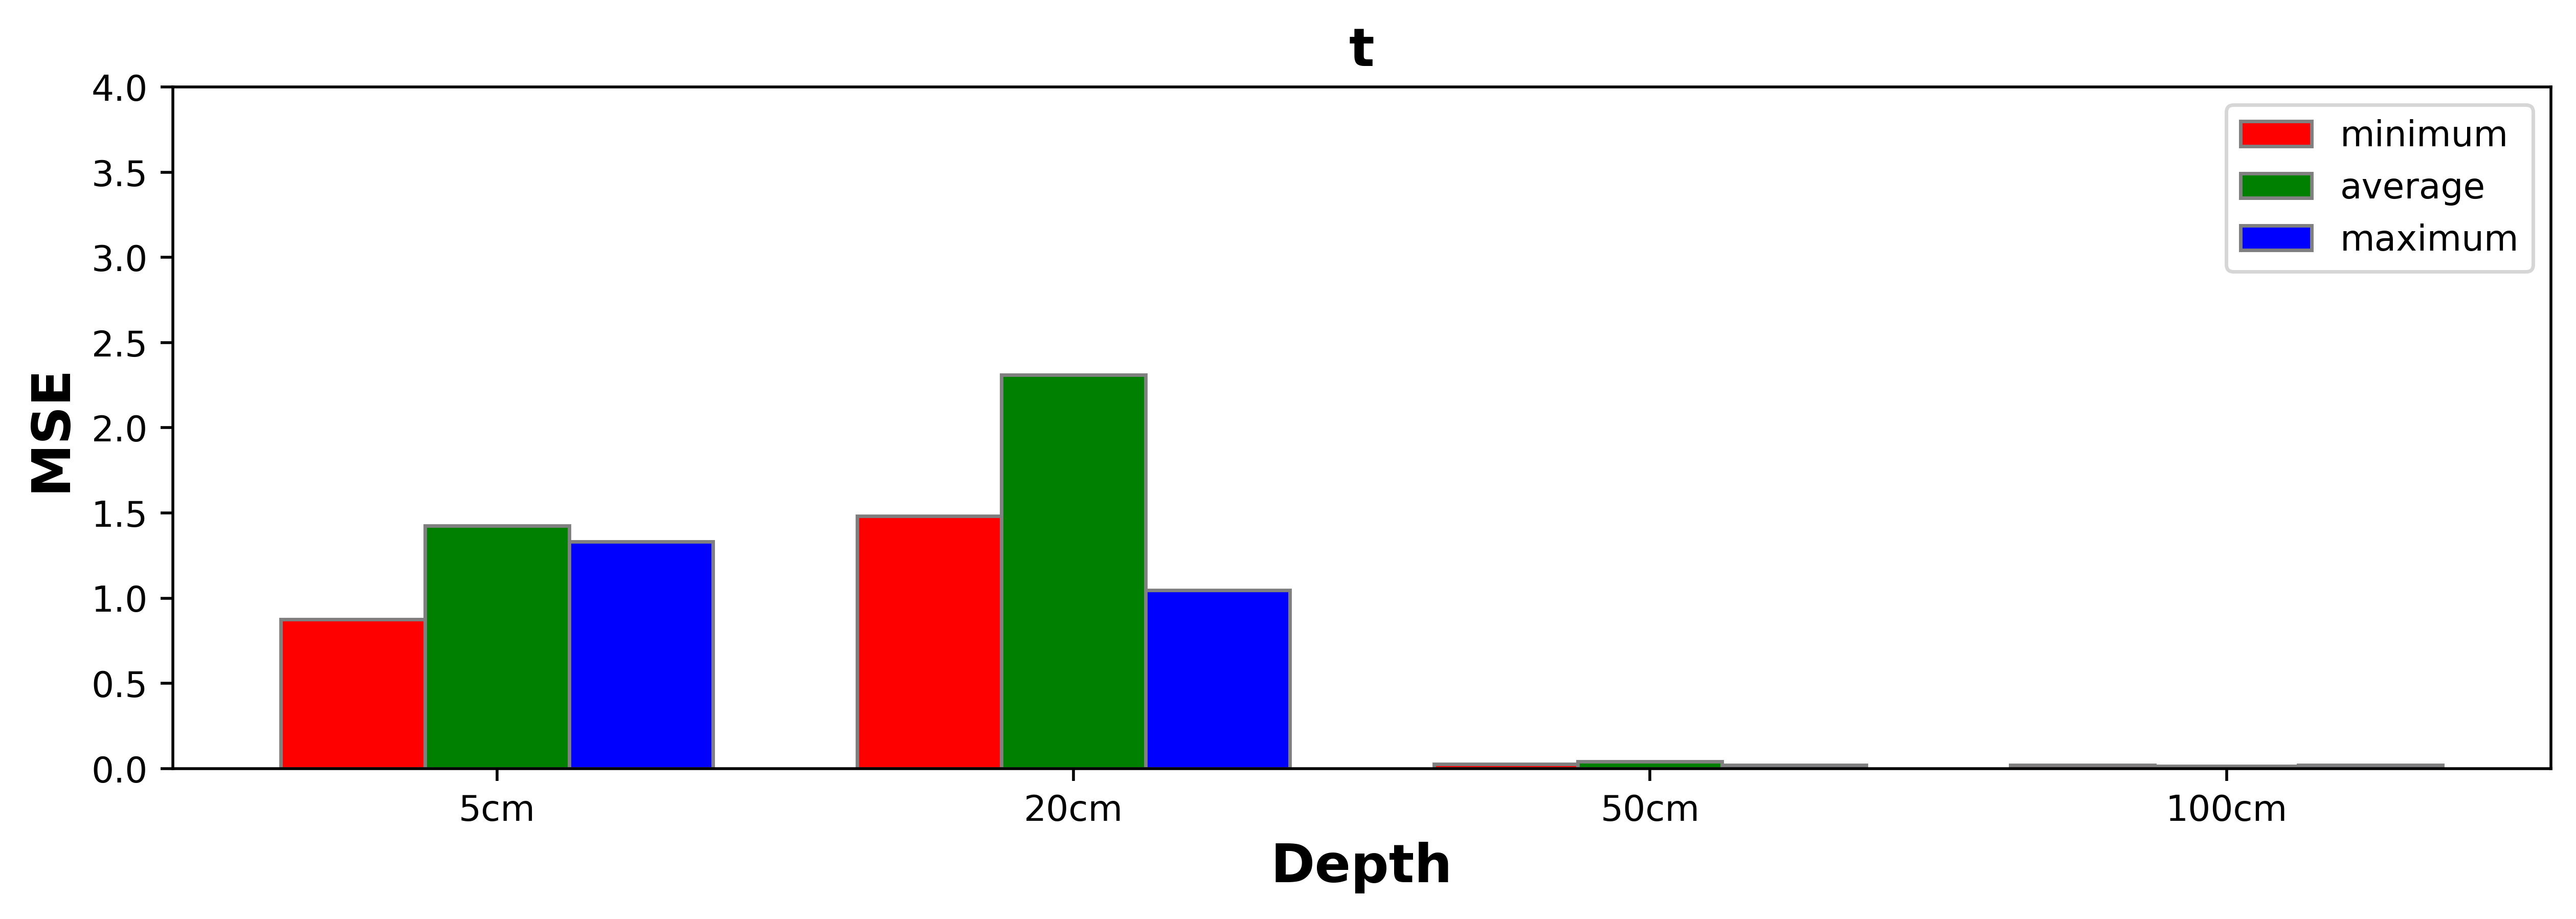

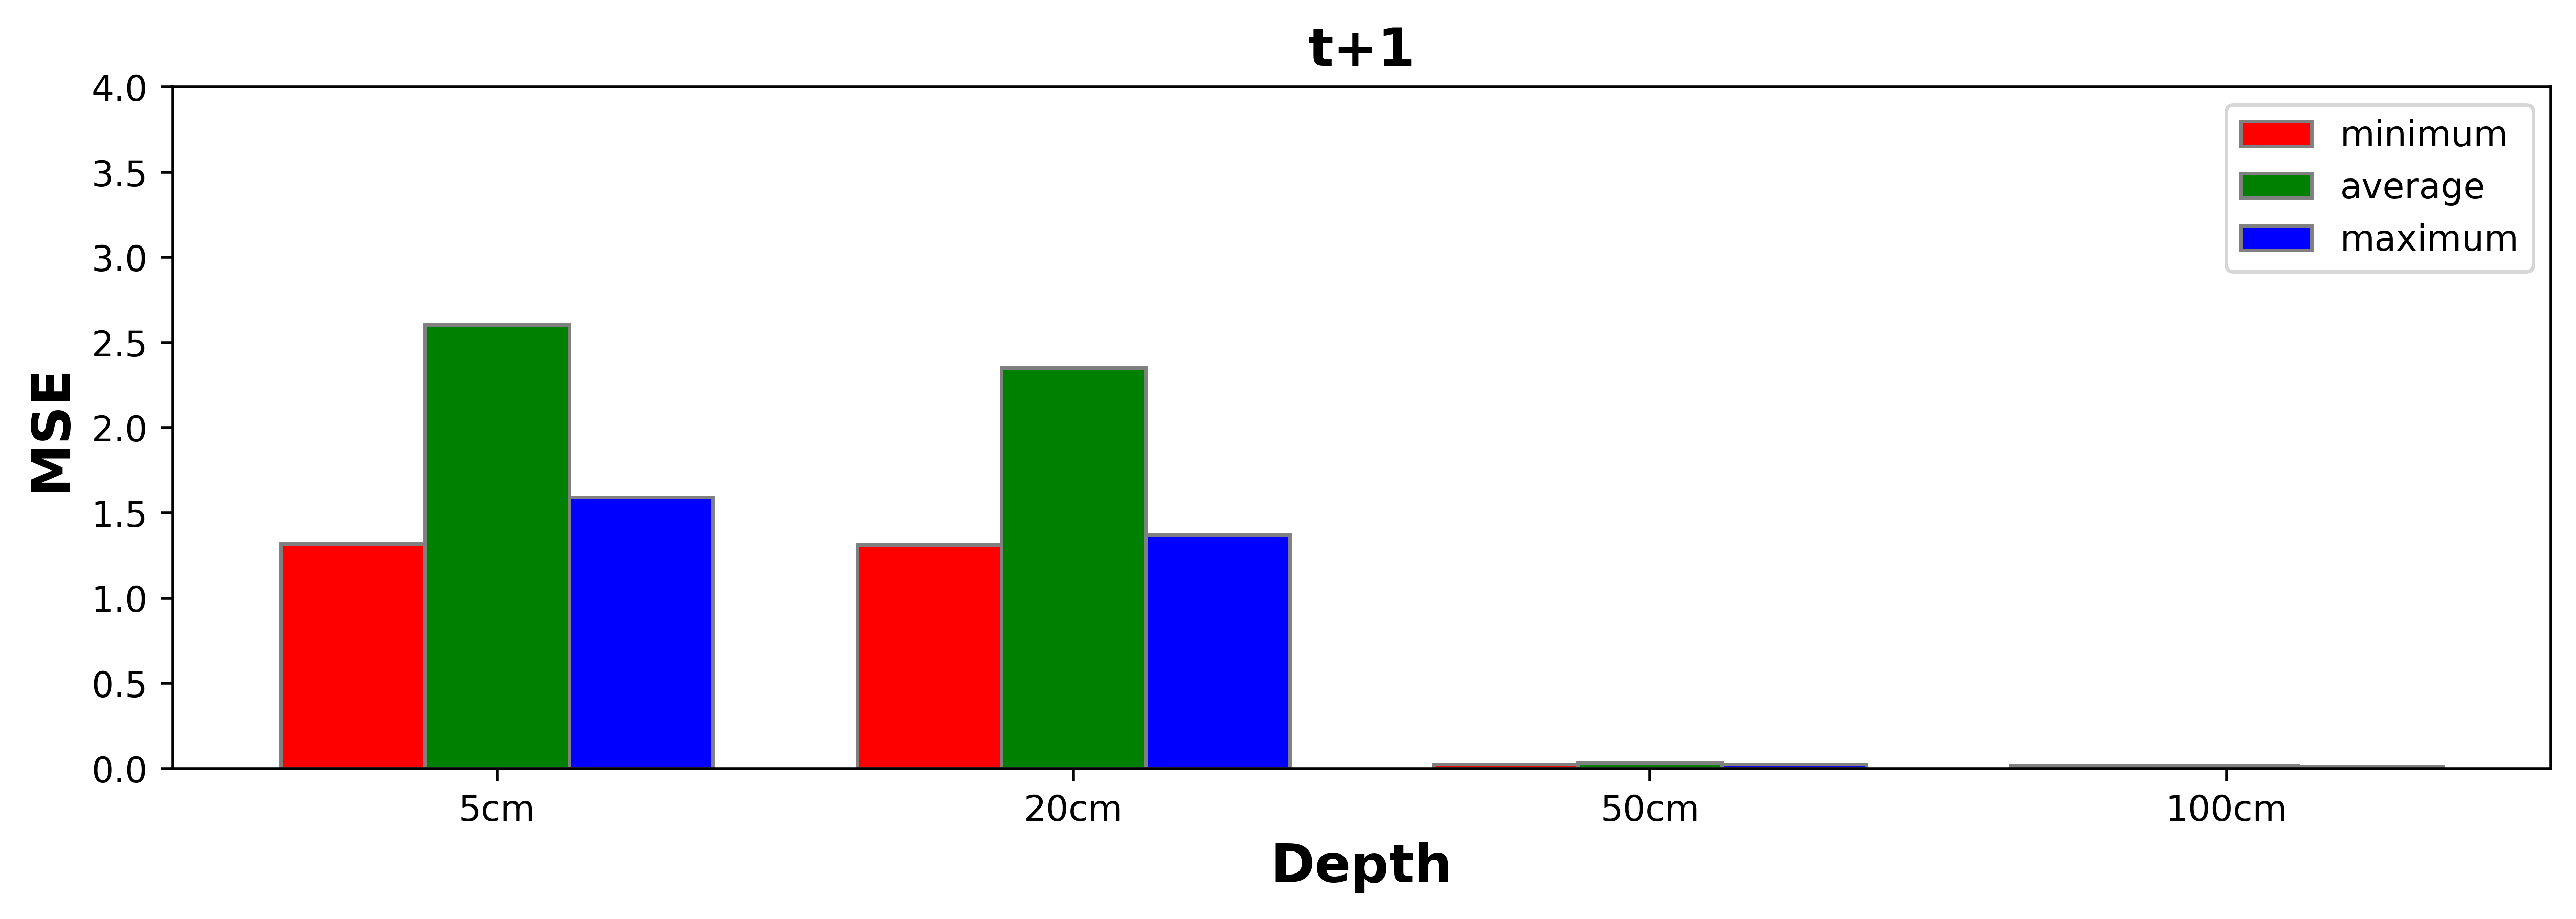

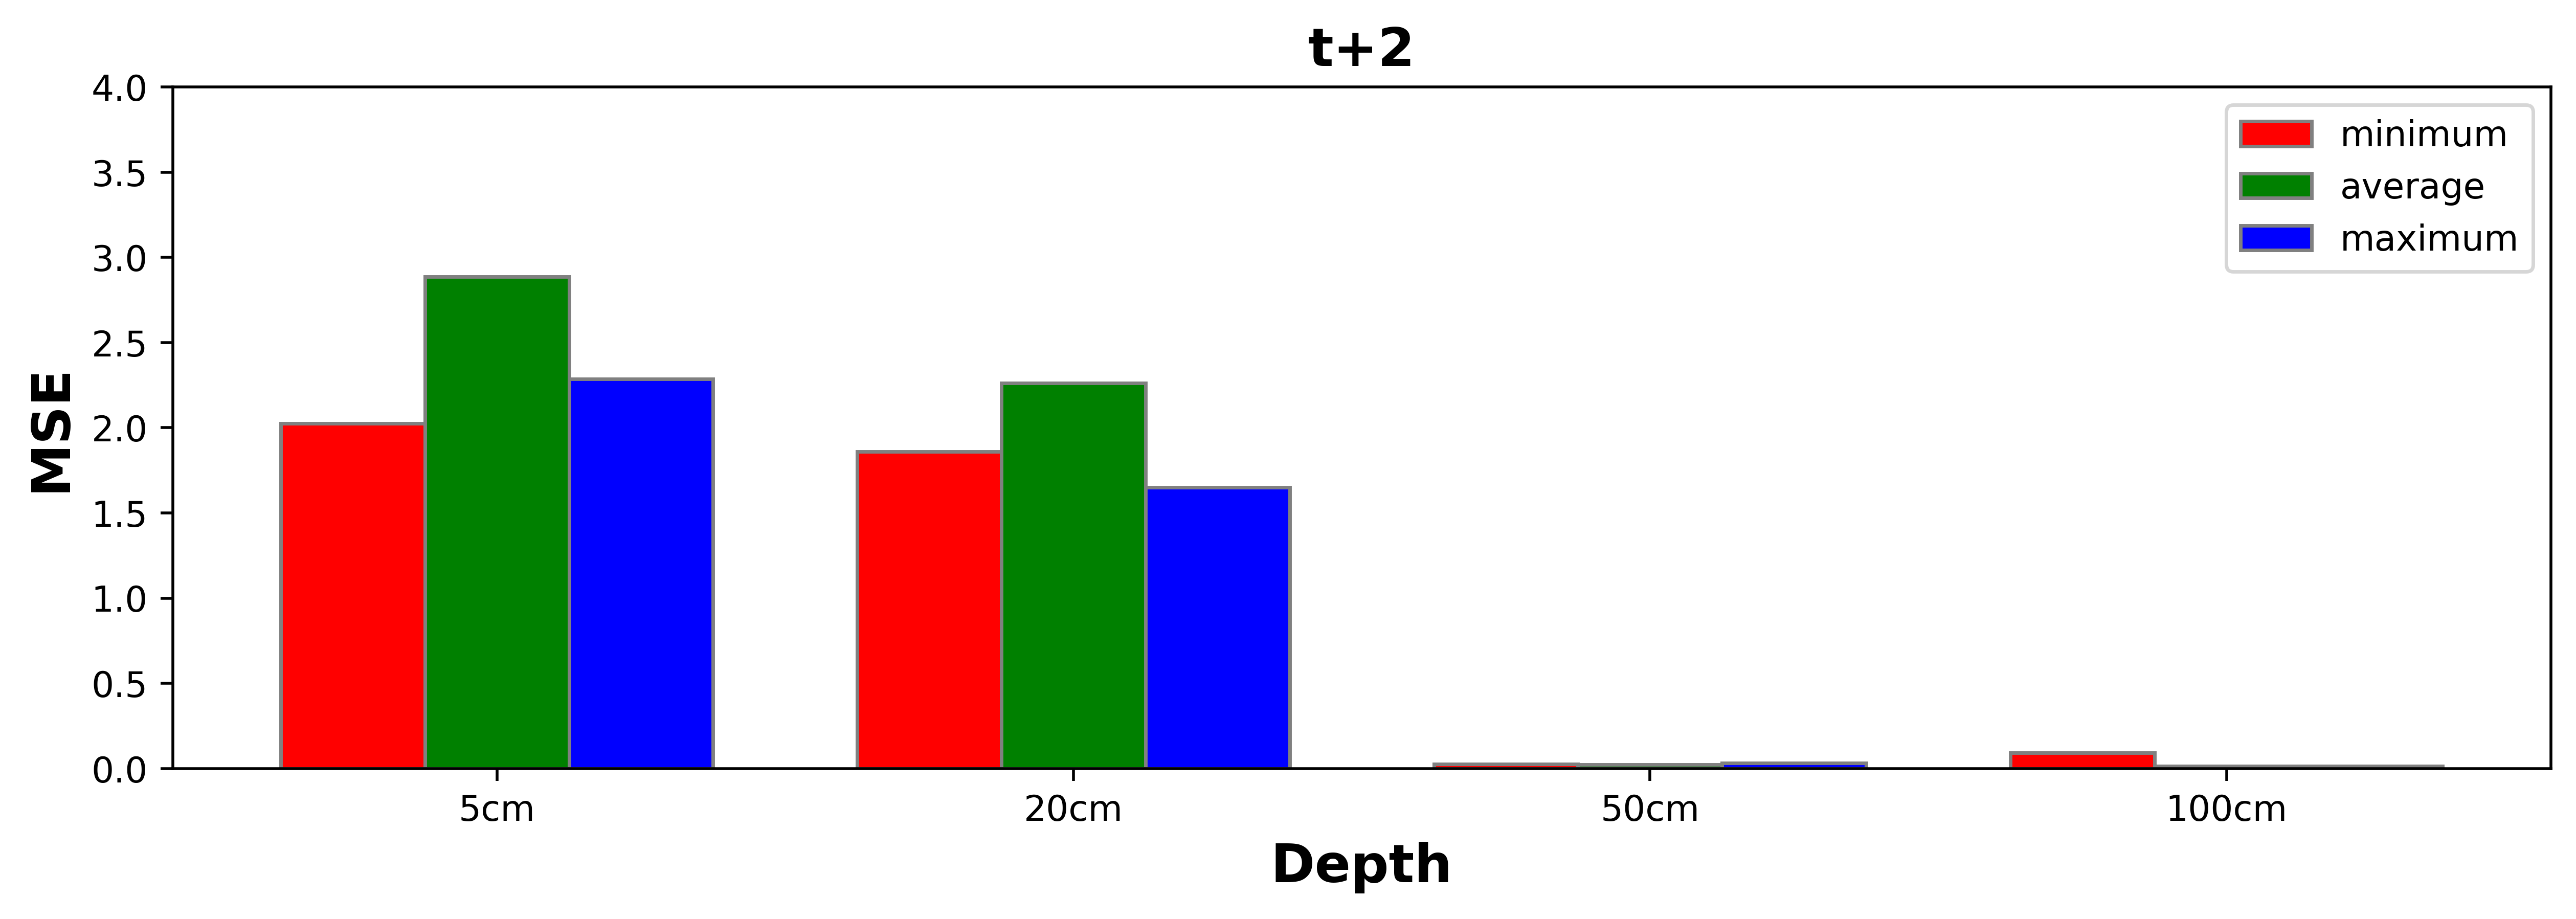

In [54]:
# set width of bar
barWidth = 0.25
plt.figure(figsize = (12,12),dpi=500)
plt.subplot(3,1,1)
# set height of bar
minimum = results_2_t[results_2_t["status"] == "min"]["mse_list"]
average = results_2_t[results_2_t["status"] == "avg"]["mse_list"]
maximum = results_2_t[results_2_t["status"] == "max"]["mse_list"]
 
# Set position of bar on X axis
br1 = np.arange(len(minimum))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, minimum, color ='r', width = barWidth,
        edgecolor ='grey', label ='minimum')
plt.bar(br2, average, color ='g', width = barWidth,
        edgecolor ='grey', label ='average')
plt.bar(br3, maximum, color ='b', width = barWidth,
        edgecolor ='grey', label ='maximum')
 
# Adding Xticks
plt.title('t', fontweight ='bold', fontsize = 15)
plt.xlabel('Depth', fontweight ='bold', fontsize = 15)
plt.ylabel('MSE', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(minimum))],
        ['5cm', '20cm', '50cm', '100cm'])
plt.ylim(0, 4)
plt.legend()

#################################################################################################
plt.figure(figsize = (12,12),dpi=500)
plt.subplot(3,1,2)
# set height of bar
minimum_2 = results_2_t1[results_2_t1["status"] == "min"]["mse_list"]
average_2 = results_2_t1[results_2_t1["status"] == "avg"]["mse_list"]
maximum_2 = results_2_t1[results_2_t1["status"] == "max"]["mse_list"]
 
# Set position of bar on X axis
br1_2 = np.arange(len(minimum_2))
br2_2 = [x + barWidth for x in br1_2]
br3_2 = [x + barWidth for x in br2_2]
 
# Make the plot
plt.bar(br1_2, minimum_2, color ='r', width = barWidth,
        edgecolor ='grey', label ='minimum')
plt.bar(br2_2, average_2, color ='g', width = barWidth,
        edgecolor ='grey', label ='average')
plt.bar(br3_2, maximum_2, color ='b', width = barWidth,
        edgecolor ='grey', label ='maximum')
 
# Adding Xticks
plt.title('t+1', fontweight ='bold', fontsize = 15)
plt.xlabel('Depth', fontweight ='bold', fontsize = 15)
plt.ylabel('MSE', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(minimum_2))],
        ['5cm', '20cm', '50cm', '100cm'])
plt.ylim(0, 4)
plt.legend()

##################################################################################################################
plt.figure(figsize = (12,12),dpi=500)
plt.subplot(3,1,3)
# set height of bar
minimum_3 = results_2_t2[results_2_t2["status"] == "min"]["mse_list"]
average_3 = results_2_t2[results_2_t2["status"] == "avg"]["mse_list"]
maximum_3 = results_2_t2[results_2_t2["status"] == "max"]["mse_list"]
 
# Set position of bar on X axis
br1_3 = np.arange(len(minimum))
br2_3 = [x + barWidth for x in br1_3]
br3_3 = [x + barWidth for x in br2_3]
 
# Make the plot
plt.bar(br1_3, minimum_3, color ='r', width = barWidth,
        edgecolor ='grey', label ='minimum')
plt.bar(br2_3, average_3, color ='g', width = barWidth,
        edgecolor ='grey', label ='average')
plt.bar(br3_3, maximum_3, color ='b', width = barWidth,
        edgecolor ='grey', label ='maximum')
 
# Adding Xticks
plt.title('t+2', fontweight ='bold', fontsize = 15)
plt.xlabel('Depth', fontweight ='bold', fontsize = 15)
plt.ylabel('MSE', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(minimum_3))],
        ['5cm', '20cm', '50cm', '100cm'])
 
plt.legend()
plt.ylim(0, 4)
plt.show()
